# **Understanding The Task**

*The Problem*

Our client, a financial institution which gives out credit agreements such as loans and credit cards, would like to reduce the uncertainty in the daily risks they must take. Honing in on specifically what area to work on, "exposure to credit risk continues to be the leading source of problems in banks world-wide" according to the Bank for International Settlements (bis.org)

*Proposing An Analytical Solutions*

What needs to be solved is the inherent risk that accompanies the "lax credit standards for borrowers and counterparties, poor portfolio risk management, or a lack of attention to changes in economic or other circumstances that can lead to a deterioration in the credit standing of a bank’s counterparties." One analytical solution to this is to use database of customers available to find any relationships between known facts and customers defaulting on their credit agreements, and hopefully more accurately predict the outcome.

# **Before We Start**

So let's assume this proposal is now greenlit. Before we start our analysis, we should open our environment to familarise ourselves with the working location and files, and to ready it with any packages necessary to analyze the data with (any requirements).

In [1]:
import sys
print("Location of executable python file is(as diff to working location): ", sys.executable)
print(" ")
print("Running python version: ", sys.version_info)
print(" ")
print("Path used for homework documents on this computer: ", sys.path[0])

Location of executable python file is(as diff to working location):  C:\Users\Jessie\Anaconda3\envs\comp47350py37\python.exe
 
Running python version:  sys.version_info(major=3, minor=7, micro=2, releaselevel='final', serial=0)
 
Path used for homework documents on this computer:  C:\Users\Jessie\Documents\Programming\DataAnalytics\Homework\Homework1


*To make a requirements file:*

On the command line, we implement some code to auto-identify the requirements for the requirements.txt file (this becomes redundant upon submission, but is an important process). Rather than the standard pip, pipreqs was used for a more efficient and minimal requirements list. This is because pip freeze saves all packages installed, whereas pipreqs and --clean ensures only those packages installed AND used go into the requirements. Pipreqs also catches packages installed without the use of pip. While this wouldn't normally matter in a virtual environment, this environment is ultimately one of learning, and thus will inevitably contain previous, now discarded, options. It should also be noted that while a different method of requirements creation was used, how you install the requirements.txt remains the same.

- *save list of dependencies with pip freeze:*  pip freeze > requirements.txt

- *Save list of dependencies with pipreqs:*   pipreqs --savepath C:\Users\Jessie\Documents\Programming\DataAnalytics\Homework\Homework1\requirements.txt
    
- *clean up unused modules at end:*   pipreqs --clean C:\Users\Jessie\Documents\Programming\DataAnalytics\Homework\Homework1\requirements.txt

- *install requirements.txt:*   pip install -r requirements.txt

# **Understanding the data we are about to analyse:**

Now that we know how to install the correct pieces necessary to view the data analysis, let's examine where the data comes from by looking at some external information on the data. We know that the data belongs to customers from a credit company that wants to better predict risky customers when approving credit. The total dataset (of which a sample was provided online and this is a small sample of 1000 chosen assumedly at random from that online sample - shown below with head/tail) is split roughly 50/50 between good and bad outcomes, including every single "bad" account (5,459), but only a random sample of 5,000 "good" accounts from a total of 242,000. This isn't fully representative as the actual ratio of "good":"bad" is closer to 44:1 than the 1:1 present in the dataset. It is also known that within the data, "aside from missing values" (implying there is potentially other values that also represent missing), there is over 500 entries into the total dataset that have distinct data values, of which an unknown as of yet % selection appears in this sample:

**-9: No record**

This means no credit history/score information is available. This can represent people who didn't have to apply through normal means such as VIP's (positive trait), or it could represent no previous existing report found (negative trait). Steps should be taken to try and identify within the -9 data which ones were most likely due to positive traits, and which were due to negative traits.
    
    
    
**-8: No Usable/Valid Accounts or Inquiries for Accounts/Trades**
This means the customers account is inactive, or very old. Any record with no activity in the last year will be deemed “not valid” but has a match at the bureau. For example: number of inquiries in the last 12 months, if the record had the last inquiry 14 months ago, then the condition of “inquiry in the last 12 months” is not satisfied. However, if your bank pulled your credit score to send you a pre-approved credit card, the bank’s inquiry is also deemed not valid! May need to see if it can be identified which of these instances occured through additional category later. 
    
**-7: Condition not Met**
No Inquiries or delinquencies. In order to distinguish people who have never enquired or had a delinquency from -8 and -9, we assign a special value of -7. We would expect a strong correlation between anyone with -7 and their result being "good"



"We have seen that the risk profiles of the -7, -8 and -9s can be considerably different, hence the assignment of different special values." This statement implies that all of these results would have been zero (thus it may be beneficial in some instances later to categorize them as zero and split the reasoning into another feature) but have different meanings behind why they were assigned a 0, and thus were assigned special denotations which will have an impact on our analysis.

# **(1) First Section**

# **Check how many rows and columns your CSV has**

In [2]:
# Import package for reading csv files 
import pandas as pd

#read csv file
mySample = pd.read_csv('CreditRisk18206383.csv')

#print num of rows and columns
print("csv file has", mySample.shape[0], "rows and", mySample.shape[1], "columns.")
print()

csv file has 1000 rows and 24 columns.



# **Print the first and the last 5 rows**

In [3]:
mySample.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Good,87,353,12,109,17,0,0,100,-7,...,12,2,1,1,3,-8,3,1,0,44
1,Good,75,154,5,76,16,0,0,94,42,...,12,4,2,2,42,-8,4,-8,1,50
2,Bad,84,220,3,94,37,0,0,97,12,...,30,9,0,0,5,95,1,3,0,40
3,Bad,66,269,0,61,40,0,0,98,59,...,17,0,1,1,49,72,6,3,3,45
4,Bad,87,211,16,139,19,0,0,95,13,...,35,4,2,1,3,-8,2,1,0,33


In [4]:
mySample.tail(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
995,Bad,54,25,13,19,3,2,2,100,-7,...,33,0,2,2,33,-8,1,1,-8,67
996,Bad,-9,85,28,179,3,5,5,50,15,...,0,2,3,3,-8,-8,-8,-8,-8,-8
997,Good,85,239,5,82,18,0,0,100,-7,...,11,0,4,4,0,-8,0,1,0,13
998,Good,56,329,5,20,11,0,0,100,-7,...,36,-7,3,3,73,55,6,3,3,100
999,Good,82,340,1,87,45,0,0,100,-7,...,27,0,10,10,3,82,6,5,0,44


# **Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types)**

In [5]:
#what kind of features are we working with?
mySample.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

These features have some interesting terms which are unique to finances, so let's analyze some of the terms used:

**Definition of trade:**
Every credit agreement between the consumer and a lending institution is represented by a separate “line” of information called a “trade line”, and is often truncated to the term “trade”. 

**Definition of inquiry:**
An “inquiry” is also a line of information, but captures when a lending institution has pulled a consumer’s credit bureau report in order to make a credit decision. 

**Definition of delinquency:**
The term “delinquency” refers to a payment received some period of time past its due date. This is typically measured in 30-day intervals, such as 60 days delinquent or 90 days delinquent.

**1) RiskPerformance:**
- Definition: Likelyhood of customer failing to meet a repayment as calculated by the bureau providing the data.
- Type: object (either string or mixed types in the column)

In [6]:
#counts the amount of unique values in column RiskPerformance
print("The number of distinct categories is: ", len(mySample.RiskPerformance.unique()))

#prints the different unique values if there isn't tons
if len(mySample.RiskPerformance.unique()) < 100:
    print("The categories are: ", mySample.RiskPerformance.unique())
print()

#Tells how many rows are 'good' in this sample
print("Good: ", end=" ") 
print(len(mySample.query("RiskPerformance == 'Good'")))

#Tells how many rows are 'bad' in this sample
print("Bad: ", end=" ") 
print(len(mySample.query("RiskPerformance == 'Bad'")))

The number of distinct categories is:  2
The categories are:  ['Good' 'Bad']

Good:  471
Bad:  529


*Conclusion: categorical*

should remain categorical as no way near enough information to split simplified categories

In [7]:
# Turn the feature 'RiskPerformance' from 'object' to 'category' type
mySample['RiskPerformance'] = mySample['RiskPerformance'].astype('category')

**2) ExternalRiskEstimate:**
- Definition: Likelyhood of customer failing to meet a repayment as calculated from other credit bureaus.
- Type: numerical (int64)

In [8]:
#counts the amount of unique values in column ExternalRiskEstimate
print("The number of distinct values is: ", len(mySample.ExternalRiskEstimate.unique()))

#max value
print()
print("Max value: ", mySample.ExternalRiskEstimate.max())

#min value
print("Min value: ", mySample.ExternalRiskEstimate.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['ExternalRiskEstimate'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['ExternalRiskEstimate'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['ExternalRiskEstimate'] == -7]))
print("Number of 0: ", len(mySample[mySample['ExternalRiskEstimate'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.ExternalRiskEstimate.unique()) < 100:
        print("The unique values are: ", mySample.ExternalRiskEstimate.unique())
        #print(mySample.ExternalRiskEstimate.value_counts())
        
#is there a cluster difference in values?
#print()
#print(mySample.groupby('RiskPerformance')['ExternalRiskEstimate'].unique())
print()

#Dispersion of bad customers
#print("ExternalRiskEstimate from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.ExternalRiskEstimate.value_counts())
mySample_badOnly.ExternalRiskEstimate.hist()
print()

#Dispersion of good customers
#print("ExternalRiskEstimate from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.ExternalRiskEstimate.value_counts())
mySample_goodOnly.ExternalRiskEstimate.hist()

print()
print("Key: orange = good, blue = bad")

The number of distinct values is:  48

Max value:  94
Min value:  -9
Number of missing values(-9):  60
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  0

The unique values are:  [87 75 84 66 63 55 82 89 76 72 74 85 56 77 70 60 73 64 -9 71 86 57 69 81
 58 80 62 79 59 68 54 90 65 92 61 78 67 88 48 91 94 83 51 50 93 47 52 43]



Key: orange = good, blue = bad


*Conclusion: continuous*

On initial inspection, it would seem benefical in changing it to categorical to match and compare external estimations of bad and good, with whether the customer turned out to be bad or good for the client company. Particularly as the scores themselves are naturally bucketed within the fininacial system - the range being: very high, high, moderate, low or very low depending on the 'score'. However, on inspection, the external risk estimate scores appear similar regardless of risk outcome, thus we may loose information if we simplify now

**3) MSinceOldestTradeOpen:**
- Definition: Months Since Oldest Trade Open, is the amount of months that have past since the oldest credit agreement which is still ongoing (not complete).
- Type: numerical(int64)
- Notes: beware of -7 if never, -8 or -9

The number of distinct values is:  348

Max value:  589
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  34
Number of missing values(-7):  0
Number of 0:  0



Key: orange = good, blue = bad


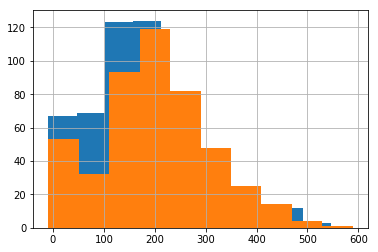

In [9]:
#counts the amount of unique values in column MSinceOldestTradeOpen
print("The number of distinct values is: ", len(mySample.MSinceOldestTradeOpen.unique()))

#max value
print()
print("Max value: ", mySample.MSinceOldestTradeOpen.max())

#min value
print("Min value: ", mySample.MSinceOldestTradeOpen.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['MSinceOldestTradeOpen'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['MSinceOldestTradeOpen'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['MSinceOldestTradeOpen'] == -7]))
print("Number of 0: ", len(mySample[mySample['MSinceOldestTradeOpen'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.MSinceOldestTradeOpen.unique()) < 100:
        print("The unique values are: ", mySample.MSinceOldestTradeOpen.unique())

print()
#print(mySample.groupby('RiskPerformance')['MSinceOldestTradeOpen'].unique())
print()

#Dispersion of bad customers
#print("MSinceOldestTradeOpen from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.MSinceOldestTradeOpen.value_counts())
mySample_badOnly.MSinceOldestTradeOpen.hist()
#print()

#Dispersion of good customers
#print("MSinceOldestTradeOpen from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.MSinceOldestTradeOpen.value_counts())
mySample_goodOnly.MSinceOldestTradeOpen.hist()

#print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

Months is logically a numerical/continuous measure. Due to high volume of slightly different values, will also provide a lot of information

**4) MSinceMostRecentTradeOpen:**
- or Months Since Most Recent Trade Open, is the amount of months since the latest/most recent/newest credit agreement was opened and is still open.
- numerical(int64)
- beware of -7 if never, -8 or -9

The number of distinct values is:  60

Max value:  184
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  11

The unique values are:  [ 12   5   3   0  16   1  17  10  32  11  25  18   6   8  15 184  -9   4
   2   9  26  41  55  14  13   7  19  33  47  20  27  28  22  42  21  36
  40  70  49  37  97  29  23  35  84 143  38  34  30 159  58 178  31  50
  56  62 163  24  48  39]

Key: orange = good, blue = bad


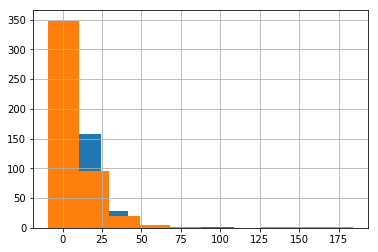

In [10]:
#counts the amount of unique values in column MSinceMostRecentTradeOpen
print("The number of distinct values is: ", len(mySample.MSinceMostRecentTradeOpen.unique()))

#max value
print()
print("Max value: ", mySample.MSinceMostRecentTradeOpen.max())

#min value
print("Min value: ", mySample.MSinceMostRecentTradeOpen.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['MSinceMostRecentTradeOpen'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['MSinceMostRecentTradeOpen'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['MSinceMostRecentTradeOpen'] == -7]))
print("Number of 0: ", len(mySample[mySample['MSinceMostRecentTradeOpen'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.MSinceMostRecentTradeOpen.unique()) < 100:
        print("The unique values are: ", mySample.MSinceMostRecentTradeOpen.unique())
        
#is there a cluster difference in values?
#print()
#print(mySample.groupby('RiskPerformance')['MSinceMostRecentTradeOpen'].unique())
#print()

#Dispersion of bad customers
#print("MSinceMostRecentTradeOpen from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.MSinceMostRecentTradeOpen.value_counts())
mySample_badOnly.MSinceMostRecentTradeOpen.hist()
#print()

#Dispersion of good customers
#print("MSinceMostRecentTradeOpen from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.MSinceMostRecentTradeOpen.value_counts())
mySample_goodOnly.MSinceMostRecentTradeOpen.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

Logical to keep as a numerical/continuous feature, as can compare oldest to newest. Some outliers present

**5) AverageMInFile:**
- or Average Months In File, is the average amount of time it takes (in months) to investigate a customers background. Theoretically, the longer it takes (higher number), chances are they are more of a risk.
- numerical(int64)
- beware of -7 if never investigated, -8 or -9

The number of distinct values is:  166

Max value:  273
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  0


Key: orange = good, blue = bad


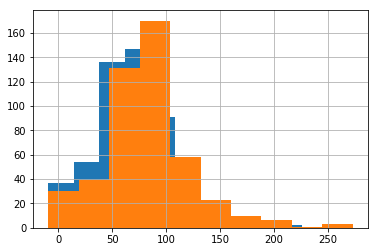

In [11]:
#counts the amount of unique values in column AverageMInFile
print("The number of distinct values is: ", len(mySample.AverageMInFile.unique()))

#max value
print()
print("Max value: ", mySample.AverageMInFile.max())

#min value
print("Min value: ", mySample.AverageMInFile.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['AverageMInFile'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['AverageMInFile'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['AverageMInFile'] == -7]))
print("Number of 0: ", len(mySample[mySample['AverageMInFile'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.AverageMInFile.unique()) < 100:
        print("The unique values are: ", mySample.AverageMInFile.unique())
        
#is there a cluster difference in values?
#print()
#print(mySample.groupby('RiskPerformance')['AverageMInFile'].unique())
#print()

#Dispersion of bad customers
#print("AverageMInFile from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.AverageMInFile.value_counts())
mySample_badOnly.AverageMInFile.hist()
#print()

#Dispersion of good customers
#print("AverageMInFile from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.AverageMInFile.value_counts())
mySample_goodOnly.AverageMInFile.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

months = numerical = continuous

**6) NumSatisfactoryTrades:**
- or Number of Satisfactory Trades, is the number of credit agreements where the customer had only on-time or "satisfactory" payments.
- numerical(int64)
- beware of -7 if never investigated, -8 or -9

The number of distinct values is:  64

Max value:  74
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  0

The unique values are:  [17 16 37 40 19 42 14  9 13 38 28 25 21 43 35 22 15 31 54 32 33 29  2 -9
 27 11 24  3 10  8 20  7  5 45 52 41 26 23 30 39 12 59 67 36  4 48 18  6
 34 46 47 49 61 58  1 44 64 74 53 55 50 56 60 51]


Key: orange = good, blue = bad


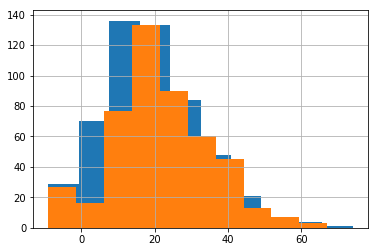

In [12]:
#counts the amount of unique values in column NumSatisfactoryTrades
print("The number of distinct values is: ", len(mySample.NumSatisfactoryTrades.unique()))

#max value
print()
print("Max value: ", mySample.NumSatisfactoryTrades.max())

#min value
print("Min value: ", mySample.NumSatisfactoryTrades.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumSatisfactoryTrades'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumSatisfactoryTrades'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumSatisfactoryTrades'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumSatisfactoryTrades'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumSatisfactoryTrades.unique()) < 100:
        print("The unique values are: ", mySample.NumSatisfactoryTrades.unique())
        
#is there a cluster difference in values?
print()
#print(mySample.groupby('RiskPerformance')['NumSatisfactoryTrades'].unique())
#print()

#Dispersion of bad customers
#print("NumSatisfactoryTrades from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumSatisfactoryTrades.value_counts())
mySample_badOnly.NumSatisfactoryTrades.hist()
#print()

#Dispersion of good customers
#print("NumSatisfactoryTrades from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumSatisfactoryTrades.value_counts())
mySample_goodOnly.NumSatisfactoryTrades.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

On initial inspection, the spread seems important as if we bucketed this data, it would good like good and bad customers both peak at around 15-20, however the bad customers are spread a bit wider surrounding the peak of good customers, thus information would be lost if made catergorical

**7) NumTrades60Ever2DerogPubRec:**
- or Number of Trades 60 Ever / Derogatory Public Record (affected by the slash “/” being replaced with a “2”), is the number of credit agreements the company has on file, and external credit bureaus have on file, where the customer made at least one payment that was at least 60 days past its due date (potential overlap with 90-day and definite overlap with any 30-day). This will be -7 or 0 if the customer has never had an overdue payment.
- presented numerical, but has -7, -8, -9 and potential for overlap, so may be more beneficial to make categorical

The number of distinct values is:  10

Max value:  10
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  637

The unique values are:  [ 0  2  1  3 -9  6  5 10  4  7]

RiskPerformance
Bad     [0, 2, 3, 1, -9, 6, 10, 4, 5, 7]
Good        [0, 1, 3, 2, -9, 5, 6, 4, 7]
Name: NumTrades60Ever2DerogPubRec, dtype: object

Key: orange = good, blue = bad


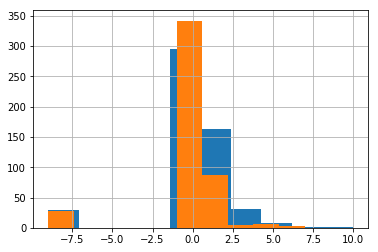

In [13]:
#counts the amount of unique values in column NumTrades60Ever2DerogPubRec
print("The number of distinct values is: ", len(mySample.NumTrades60Ever2DerogPubRec.unique()))

#max value
print()
print("Max value: ", mySample.NumTrades60Ever2DerogPubRec.max())

#min value
print("Min value: ", mySample.NumTrades60Ever2DerogPubRec.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumTrades60Ever2DerogPubRec'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumTrades60Ever2DerogPubRec'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumTrades60Ever2DerogPubRec'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumTrades60Ever2DerogPubRec'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumTrades60Ever2DerogPubRec.unique()) < 100:
        print("The unique values are: ", mySample.NumTrades60Ever2DerogPubRec.unique())
        #print(mySample.NumTrades60Ever2DerogPubRec.value_counts())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['NumTrades60Ever2DerogPubRec'].unique())
#print()

#Dispersion of bad customers
#print("NumTrades60Ever2DerogPubRec from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumTrades60Ever2DerogPubRec.value_counts())
mySample_badOnly.NumTrades60Ever2DerogPubRec.hist()
#print()

#Dispersion of good customers
#print("NumTrades60Ever2DerogPubRec from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumTrades60Ever2DerogPubRec.value_counts())
mySample_goodOnly.NumTrades60Ever2DerogPubRec.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: suggest change to category*

As more than 50% of the data is in 1 specific value (0), may benefit from being a categorical feature with bins: never(0), once or twice(1-2), 3-5 times, 6+ times, as looking at the data these bins can retain the trend within the unique values while not spreading it too thin.

also 728(never made it to 90, res=0) - 637(never made it to 60 - res=0) = 91 (number of people who made it to 60 days but didnt overlap with the 90 days)

**8) NumTrades90Ever2DerogPubRec:** 
- or Number of Trades 90 Ever / Derogatory Public Record (affected by the slash “/” being replaced with a “2”), is the number of credit agreements the company has on file, and external credit bureaus have on file, where the customer made at least one payment that was at least 90 days past its due date (definite overlap with 30-day and 60-day). This will be -7 or 0 if the customer has never had an overdue payment.
- presented numerical, but has -7, -8, -9 and potential for overlap, so may be more beneficial to make categorical

The number of distinct values is:  10

Max value:  10
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  728

The unique values are:  [ 0  1  3 -9  2  6 10  4  5  7]

RiskPerformance
Bad     [0, 1, 3, -9, 2, 6, 10, 4, 5]
Good        [0, 1, -9, 3, 2, 4, 6, 7]
Name: NumTrades90Ever2DerogPubRec, dtype: object

Key: orange = good, blue = bad


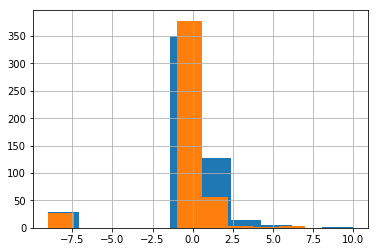

In [14]:
#counts the amount of unique values in column NumTrades90Ever2DerogPubRec
print("The number of distinct values is: ", len(mySample.NumTrades90Ever2DerogPubRec.unique()))

#max value
print()
print("Max value: ", mySample.NumTrades90Ever2DerogPubRec.max())

#min value
print("Min value: ", mySample.NumTrades90Ever2DerogPubRec.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumTrades90Ever2DerogPubRec'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumTrades90Ever2DerogPubRec'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumTrades90Ever2DerogPubRec'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumTrades90Ever2DerogPubRec'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumTrades90Ever2DerogPubRec.unique()) < 100:
        print("The unique values are: ", mySample.NumTrades90Ever2DerogPubRec.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['NumTrades90Ever2DerogPubRec'].unique())
#print()

#Dispersion of bad customers
#print("NumTrades90Ever2DerogPubRec from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumTrades90Ever2DerogPubRec.value_counts())
mySample_badOnly.NumTrades90Ever2DerogPubRec.hist()
#print()

#Dispersion of good customers
#print("NumTrades90Ever2DerogPubRec from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumTrades90Ever2DerogPubRec.value_counts())
mySample_goodOnly.NumTrades90Ever2DerogPubRec.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: suggest change to categorical*

3/4(728 out of 1000 + 56 unknown out of 1000) of all values are 0. Also change to make comparison with NumTrades60Ever2DerogPubRec easier
bins: never(0), once or twice(1-2), 3-5 times, 6+ times

also, 1000 rows - 637(never made it to initial 60 incl) - 91(didnt overlap to 90) = 272 people who made it to 90 but who are also counted in 60 days (under a simplified time assumption and the assumption that this overlap exists)

**9)PercentTradesNeverDelq:**
- or Percentage of Trades Never Delinquent, is the percentage of credit agreements where there was never any instance of delinquencies/overdue payments present.
- numerical(int64)

The number of distinct values is:  49

Max value:  100
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  0

The unique values are:  [100  94  97  98  95  87  69  85  93  89  82  83  86  96  -9  75  60  56
  71  55  76  84  67  92  64  91  72  90  79  40  77  88  70  80  43  68
  62  50  78  81  74  38  58  57  65  66  73  99  33]

RiskPerformance
Bad     [97, 98, 95, 87, 69, 100, 85, 83, 94, 96, -9, ...
Good    [100, 94, 93, 89, 82, 87, 98, 86, -9, 96, 97, ...
Name: PercentTradesNeverDelq, dtype: object

Key: orange = good, blue = bad


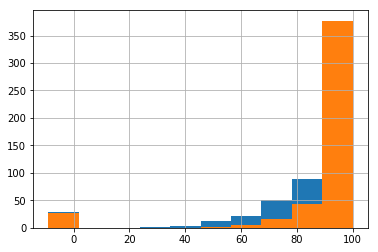

In [15]:
#counts the amount of unique values in column PercentTradesNeverDelq
print("The number of distinct values is: ", len(mySample.PercentTradesNeverDelq.unique()))

#max value
print()
print("Max value: ", mySample.PercentTradesNeverDelq.max())

#min value
print("Min value: ", mySample.PercentTradesNeverDelq.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['PercentTradesNeverDelq'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['PercentTradesNeverDelq'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['PercentTradesNeverDelq'] == -7]))
print("Number of 0: ", len(mySample[mySample['PercentTradesNeverDelq'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.PercentTradesNeverDelq.unique()) < 100:
        print("The unique values are: ", mySample.PercentTradesNeverDelq.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['PercentTradesNeverDelq'].unique())
#print()

#Dispersion of bad customers
#print("PercentTradesNeverDelq from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.PercentTradesNeverDelq.value_counts())
mySample_badOnly.PercentTradesNeverDelq.hist()
#print()

#Dispersion of good customers
#print("PercentTradesNeverDelq from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.PercentTradesNeverDelq.value_counts())
mySample_goodOnly.PercentTradesNeverDelq.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

Logical to remain a continuous feature and a logical correlation of the more transactions without delinquincy, the more reliable the customer

**10)MSinceMostRecentDelq:**
- or Months Since Most Recent Delinquency, is the number of months since the customer last had a 'woopsie' and paid late (made a delinquency). This will be -7 if the customer has never had an overdue payment.
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  80

Max value:  80
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  10
Number of missing values(-7):  450
Number of 0:  7

The unique values are:  [-7 42 12 59 13 10  6 55  4 25  0 29  3 33 27 49 -9  2  7 36  9 14 38  8
 44 18  1 24  5 22 45 37 61 -8 66 34 53 62 21 15 20 26 68 16 46 50 75 73
 28 76 70 41 39 19 30 69 17 11 65 35 51 64 43 32 23 72 57 54 58 74 40 31
 47 48 63 77 67 78 60 80]

Key: orange = good, blue = bad


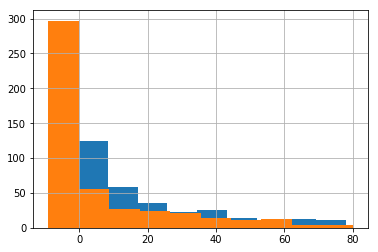

In [16]:
#counts the amount of unique values in column MSinceMostRecentDelq
print("The number of distinct values is: ", len(mySample.MSinceMostRecentDelq.unique()))

#max value
print()
print("Max value: ", mySample.MSinceMostRecentDelq.max())

#min value
print("Min value: ", mySample.MSinceMostRecentDelq.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['MSinceMostRecentDelq'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['MSinceMostRecentDelq'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['MSinceMostRecentDelq'] == -7]))
print("Number of 0: ", len(mySample[mySample['MSinceMostRecentDelq'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.MSinceMostRecentDelq.unique()) < 100:
        print("The unique values are: ", mySample.MSinceMostRecentDelq.unique())
        
#is there a cluster difference in values?
#print()
#print(mySample.groupby('RiskPerformance')['MSinceMostRecentDelq'].unique())
#print()

#Dispersion of bad customers
#print("MSinceMostRecentDelq from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.MSinceMostRecentDelq.value_counts())
mySample_badOnly.MSinceMostRecentDelq.hist()
#print()

#Dispersion of good customers
#print("MSinceMostRecentDelq from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.MSinceMostRecentDelq.value_counts())
mySample_goodOnly.MSinceMostRecentDelq.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: suggest change to category*

There is a lot of data contained in the -7, -8 and -9, and after visualizing the data in chunks or 'bins', it may be of more use categorically as the minus and 0 greatly eclipses the rest of the pattern, as well as there being quite visible 'steps' in the data

**11)MaxDelq2PublicRecLast12M:**
- or Maximum Delinquencies / Public Records in the Last 12 Months (affected by the slash “/” being replaced with a “2”), is the most number of overdue payments in one single credit agreement (e.g. loan, etc) to either this company or another credit bureau, but only in the last 12 months. This will be -7 if the customer has never had an overdue payment.
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  10

Max value:  9
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  38

The unique values are:  [ 7  6  4  3  0 -9  5  1  9  2]

MaxDelq2PublicRecLast12M from Defaulting Customers
 6    172
 7    158
 4    107
 0     31
-9     29
 5     15
 3     11
 2      3
 9      2
 1      1
Name: MaxDelq2PublicRecLast12M, dtype: int64

MaxDelq2PublicRecLast12M from Good Customers
 7    245
 6    122
 4     52
-9     27
 3     10
 0      7
 5      5
 1      3
Name: MaxDelq2PublicRecLast12M, dtype: int64

Key: orange = good, blue = bad


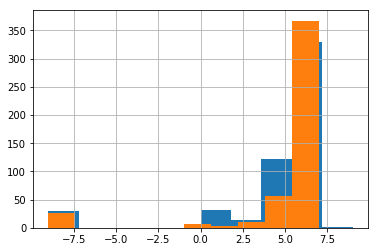

In [17]:
#counts the amount of unique values in column MaxDelq2PublicRecLast12M
print("The number of distinct values is: ", len(mySample.MaxDelq2PublicRecLast12M.unique()))

#max value
print()
print("Max value: ", mySample.MaxDelq2PublicRecLast12M.max())

#min value
print("Min value: ", mySample.MaxDelq2PublicRecLast12M.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['MaxDelq2PublicRecLast12M'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['MaxDelq2PublicRecLast12M'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['MaxDelq2PublicRecLast12M'] == -7]))
print("Number of 0: ", len(mySample[mySample['MaxDelq2PublicRecLast12M'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.MaxDelq2PublicRecLast12M.unique()) < 100:
        print("The unique values are: ", mySample.MaxDelq2PublicRecLast12M.unique())
        
#is there a cluster difference in values?
#print()
#print(mySample.groupby('RiskPerformance')['MaxDelq2PublicRecLast12M'].unique())
print()

#Dispersion of bad customers
print("MaxDelq2PublicRecLast12M from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
print(mySample_badOnly.MaxDelq2PublicRecLast12M.value_counts())
mySample_badOnly.MaxDelq2PublicRecLast12M.hist()
print()

#Dispersion of good customers
print("MaxDelq2PublicRecLast12M from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
print(mySample_goodOnly.MaxDelq2PublicRecLast12M.value_counts())
mySample_goodOnly.MaxDelq2PublicRecLast12M.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: whut?*
....I mean continuous. But why are the good customers more delinquint than the bad????? Possible pattern with 'bad' customers as smaller but more regular delinquincy. Would this trend be better represented as categorical?

**12)MaxDelqEver:**
- or Maximum Delinquencies Ever, is the most number of overdue payments in one single credit agreement (e.g. loan, etc) to this company. This will be -7 or 0 if the customer has never had an overdue payment.
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  8

Max value:  8
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  0

The unique values are:  [ 8  6  5  4  3 -9  2  7]

MaxDelqEver from Defaulting Customers
 8    182
 6    161
 5     62
 2     62
-9     29
 4     17
 3     15
 7      1
Name: MaxDelqEver, dtype: int64

MaxDelqEver from Good Customers
 8    258
 6    101
 5     38
-9     27
 2     20
 7      9
 4      9
 3      9
Name: MaxDelqEver, dtype: int64

Key: orange = good, blue = bad


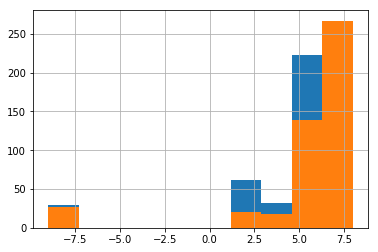

In [18]:
#counts the amount of unique values in column MaxDelqEver
print("The number of distinct values is: ", len(mySample.MaxDelqEver.unique()))

#max value
print()
print("Max value: ", mySample.MaxDelqEver.max())

#min value
print("Min value: ", mySample.MaxDelqEver.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['MaxDelqEver'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['MaxDelqEver'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['MaxDelqEver'] == -7]))
print("Number of 0: ", len(mySample[mySample['MaxDelqEver'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.MaxDelqEver.unique()) < 100:
        print("The unique values are: ", mySample.MaxDelqEver.unique())
        #print(mySample.MaxDelqEver.value_counts())
        print()
        
#is there a cluster difference in values?
#Dispersion of bad customers
print("MaxDelqEver from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
print(mySample_badOnly.MaxDelqEver.value_counts())
mySample_badOnly.MaxDelqEver.hist()
print()

#Dispersion of good customers
print("MaxDelqEver from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
print(mySample_goodOnly.MaxDelqEver.value_counts())
mySample_goodOnly.MaxDelqEver.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

Logic would dictate that those who were more likely to default would have a higher number of total delinquincies....but again the pattern of less but more often appears. There's also a mismatching pattern with the rest of the data that implies that every customer has at least 2 delinquencies, but this isn't true if you look at the -7 values in other columns!

**13)NumTotalTrades:**
- or Number of Total Trades, is the total number of credit agreements a customer has entered with the client's credit bureau.
- numerical(int64)

The number of distinct values is:  68

Max value:  77
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  18

The unique values are:  [17 18 37 46 20 48  0 16  9 15 40 29 31 14 21 44 22 38 23 42 52 36 24 35
 -9 33 11  4 26 19 43  8  7 45 54 60 41  5 13 32 59 74 34 25 51  2  6 28
 10 47 12  1 39 27 30 50 49  3 57 63 71 77 58 62 67 61 55 56]



Key: orange = good, blue = bad


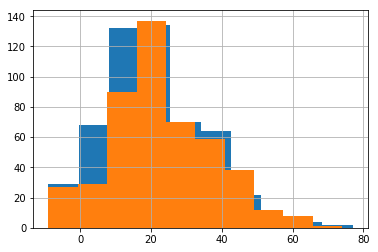

In [19]:
#counts the amount of unique values in column NumTotalTrades
print("The number of distinct values is: ", len(mySample.NumTotalTrades.unique()))

#max value
print()
print("Max value: ", mySample.NumTotalTrades.max())

#min value
print("Min value: ", mySample.NumTotalTrades.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumTotalTrades'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumTotalTrades'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumTotalTrades'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumTotalTrades'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumTotalTrades.unique()) < 100:
        print("The unique values are: ", mySample.NumTotalTrades.unique())
        
#is there a cluster difference in values?
print()
#print(mySample.groupby('RiskPerformance')['NumTotalTrades'].unique())
#print()

#Dispersion of bad customers
#print("NumTotalTrades from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumTotalTrades.value_counts())
mySample_badOnly.NumTotalTrades.hist()
print()

#Dispersion of good customers
#print()
#print("NumTotalTrades from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumTotalTrades.value_counts())
mySample_goodOnly.NumTotalTrades.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

**14)NumTradesOpeninLast12M:**
- or Number of Trades Open in the Last 12 Months, is the total number of credit agreements a customer has open or opened now and in the past 12 months with the client bureau.
- numerical(int64)

The number of distinct values is:  12

Max value:  10
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  234

The unique values are:  [ 0  2  3  4  1 -9  5  9  6  7 10  8]



Key: orange = good, blue = bad


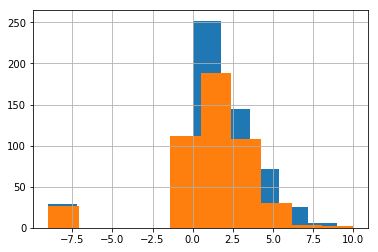

In [20]:
#counts the amount of unique values in column NumTradesOpeninLast12M
print("The number of distinct values is: ", len(mySample.NumTradesOpeninLast12M.unique()))

#max value
print()
print("Max value: ", mySample.NumTradesOpeninLast12M.max())

#min value
print("Min value: ", mySample.NumTradesOpeninLast12M.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumTradesOpeninLast12M'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumTradesOpeninLast12M'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumTradesOpeninLast12M'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumTradesOpeninLast12M'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumTradesOpeninLast12M.unique()) < 100:
        print("The unique values are: ", mySample.NumTradesOpeninLast12M.unique())
        
#is there a cluster difference in values?
print()
#print(mySample.groupby('RiskPerformance')['NumTotalTrades'].unique())
#print()

#Dispersion of bad customers
#print("NumTradesOpeninLast12M from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumTradesOpeninLast12M.value_counts())
mySample_badOnly.NumTradesOpeninLast12M.hist()
print()

#Dispersion of good customers
#print()
#print("NumTradesOpeninLast12M from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumTradesOpeninLast12M.value_counts())
mySample_goodOnly.NumTradesOpeninLast12M.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

Value in how many in last 12 months as can see even though in same region, different distributions slightly between defaulters and non-defaulters

**15)PercentInstallTrades:**
- or Percentage Install Trades, is the number of credit agreements where the total was broken up into percentage installments/repayments rather than paying back the total in one lump sum.
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  77

Max value:  100
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  30

The unique values are:  [ 12  30  17  35  56  44  22  47  25  64  19   0  57  23  32  29  41  34
  43  33  24  40   7  -9  27  53  18  48  21  60  28  38  20  54  10  14
  45   8  36  51  39  50  58 100  42   9  67  78  55  46   6   5  26  62
  31  15  37  52   4  68  13  11  73  76  16  89  49  80  71  59  75  63
   3  61  72  65  70]



Key: orange = good, blue = bad


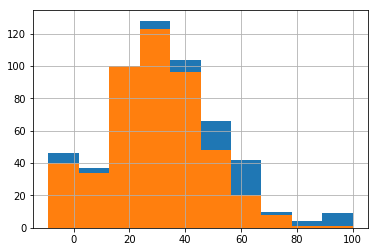

In [21]:
#counts the amount of unique values in column PercentInstallTrades
print("The number of distinct values is: ", len(mySample.PercentInstallTrades.unique()))

#max value
print()
print("Max value: ", mySample.PercentInstallTrades.max())

#min value
print("Min value: ", mySample.PercentInstallTrades.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['PercentInstallTrades'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['PercentInstallTrades'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['PercentInstallTrades'] == -7]))
print("Number of 0: ", len(mySample[mySample['PercentInstallTrades'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.PercentInstallTrades.unique()) < 100:
        print("The unique values are: ", mySample.PercentInstallTrades.unique())
        
#is there a cluster difference in values?
print()
#print(mySample.groupby('RiskPerformance')['PercentInstallTrades'].unique())
#print()

#Dispersion of bad customers
#print("PercentInstallTrades from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.PercentInstallTrades.value_counts())
mySample_badOnly.PercentInstallTrades.hist()
print()

#Dispersion of good customers
#print()
#print("PercentInstallTrades from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.PercentInstallTrades.value_counts())
mySample_goodOnly.PercentInstallTrades.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

**16)MSinceMostRecentInqexcl7days:**
- or Months Since Most Recent Inquery (excluding the last 7 days), is the number of months since last/most recent/latest application/inquery for a credit agreement, excluding the last week
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  28

Max value:  24
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  47
Number of missing values(-7):  187
Number of 0:  431

The unique values are:  [ 2  4  9  0 -7  3 10  6 -8 12 15  5 22 -9  1 20  7 17 16 23 13 21  8 19
 14 24 11 18]

RiskPerformance
Bad     [9, 0, 4, -7, 10, 6, -8, 12, -9, 3, 15, 1, 7, ...
Good    [2, 4, 3, 0, -8, 6, 15, 5, 22, 1, -9, -7, 20, ...
Name: MSinceMostRecentInqexcl7days, dtype: object


Key: orange = good, blue = bad


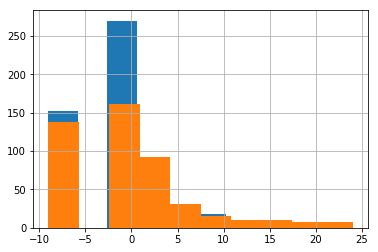

In [22]:
#counts the amount of unique values in column MSinceMostRecentInqexcl7days
print("The number of distinct values is: ", len(mySample.MSinceMostRecentInqexcl7days.unique()))

#max value
print()
print("Max value: ", mySample.MSinceMostRecentInqexcl7days.max())

#min value
print("Min value: ", mySample.MSinceMostRecentInqexcl7days.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['MSinceMostRecentInqexcl7days'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['MSinceMostRecentInqexcl7days'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['MSinceMostRecentInqexcl7days'] == -7]))
print("Number of 0: ", len(mySample[mySample['MSinceMostRecentInqexcl7days'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.MSinceMostRecentInqexcl7days.unique()) < 100:
        print("The unique values are: ", mySample.MSinceMostRecentInqexcl7days.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['MSinceMostRecentInqexcl7days'].unique())
#print()

#Dispersion of bad customers
#print("MSinceMostRecentInqexcl7days from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.MSinceMostRecentInqexcl7days.value_counts())
mySample_badOnly.MSinceMostRecentInqexcl7days.hist()
print()

#Dispersion of good customers
#print()
#print("MSinceMostRecentInqexcl7days from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.MSinceMostRecentInqexcl7days.value_counts())
mySample_goodOnly.MSinceMostRecentInqexcl7days.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: suggest change to category*

due to the majority being between -7,-8,-9 and 0

this seems unusual in the number of people(431) in the last month - 7 days have made inquiries

**17)NumInqLast6M:**
- or Number of Inqueries made in the Last 6 Months, is the total number of inqueries about credit agreements made in the last 6 months
- numerical(int64)

The number of distinct values is:  16

Max value:  17
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  367

The unique values are:  [ 1  2  0  3  4 -9  6  5 12  8  9 10  7 13 11 17]

RiskPerformance
Bad     [0, 1, 2, 3, 4, -9, 6, 5, 12, 8, 9, 10, 7, 13,...
Good                  [1, 2, 0, -9, 4, 6, 3, 5, 10, 8, 7]
Name: NumInqLast6M, dtype: object


Key: orange = good, blue = bad


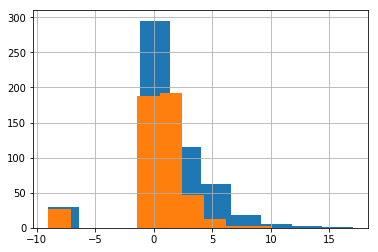

In [23]:
#counts the amount of unique values in column NumInqLast6M
print("The number of distinct values is: ", len(mySample.NumInqLast6M.unique()))

#max value
print()
print("Max value: ", mySample.NumInqLast6M.max())

#min value
print("Min value: ", mySample.NumInqLast6M.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumInqLast6M'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumInqLast6M'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumInqLast6M'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumInqLast6M'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumInqLast6M.unique()) < 100:
        print("The unique values are: ", mySample.NumInqLast6M.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['NumInqLast6M'].unique())
#print()

#Dispersion of bad customers
#print("NumInqLast6M from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumInqLast6M.value_counts())
mySample_badOnly.NumInqLast6M.hist()
print()

#Dispersion of good customers
#print()
#print("NumInqLast6M from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumInqLast6M.value_counts())
mySample_goodOnly.NumInqLast6M.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: suggest change to category*

At least half of data in 0 category. Could easily be represented with - yes/did enquire, no/didn't enquire or unknown


**18)NumInqLast6Mexcl7days:**
- or Number of Inqueries made in the Last 6 Months (excluding the last 7 days), is the exact same, but excluding the past week (why?)
- numerical(int64)

The number of distinct values is:  16

Max value:  14
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  0
Number of missing values(-7):  0
Number of 0:  374

The unique values are:  [ 1  2  0  3  4 -9  6  5 11  8  9 10  7 12 13 14]

RiskPerformance
Bad     [0, 1, 2, 3, 4, -9, 6, 5, 11, 8, 9, 10, 7, 12,...
Good                  [1, 2, 0, -9, 4, 6, 3, 5, 10, 8, 7]
Name: NumInqLast6Mexcl7days, dtype: object


Key: orange = good, blue = bad


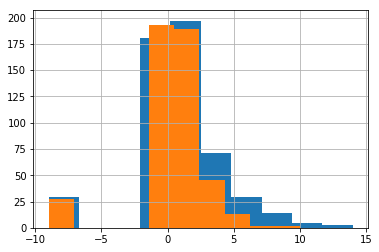

In [24]:
#counts the amount of unique values in column NumInqLast6Mexcl7days
print("The number of distinct values is: ", len(mySample.NumInqLast6Mexcl7days.unique()))

#max value
print()
print("Max value: ", mySample.NumInqLast6Mexcl7days.max())

#min value
print("Min value: ", mySample.NumInqLast6Mexcl7days.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumInqLast6Mexcl7days'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumInqLast6Mexcl7days'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumInqLast6Mexcl7days'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumInqLast6Mexcl7days'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumInqLast6Mexcl7days.unique()) < 100:
        print("The unique values are: ", mySample.NumInqLast6Mexcl7days.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['NumInqLast6Mexcl7days'].unique())
#print()

#Dispersion of bad customers
#print("NumInqLast6Mexcl7days from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumInqLast6Mexcl7days.value_counts())
mySample_badOnly.NumInqLast6Mexcl7days.hist()
print()

#Dispersion of good customers
#print()
#print("NumInqLast6Mexcl7days from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumInqLast6Mexcl7days.value_counts())
mySample_goodOnly.NumInqLast6Mexcl7days.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: suggest change to category*

Again, yes/no/unknown captures the majority of the data and may present new information when not splitting people as too different with numerical values

**19)NetFractionRevolvingBurden:**
- or Net Fraction Revolving Burden, is the net/leftover/remaining percent/fraction of your total 'revovling repaymant', which is like a credit card repayment where you can take and repay amounts up to a limit as you please (unlike paying back in installments), so a customers limit minus what they've used is their net remaining. However, burden implies what is actually being measured is how close a customer is to their limit so 80% of total used is worse than 5% of total used. Carrying high balances drags up your risk. 
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  106

Max value:  115
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  18
Number of missing values(-7):  0
Number of 0:  59


RiskPerformance
Bad     [5, 49, 3, 42, 88, 1, 6, 12, 36, 57, 18, -9, 6...
Good    [3, 42, 12, 2, 29, 51, 58, 28, 26, 6, 10, 44, ...
Name: NetFractionRevolvingBurden, dtype: object


Key: orange = good, blue = bad


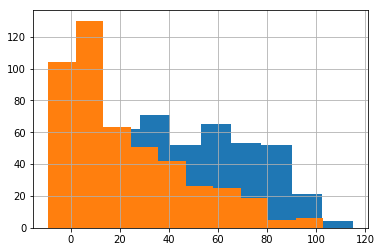

In [25]:
#counts the amount of unique values in column NetFractionRevolvingBurden
print("The number of distinct values is: ", len(mySample.NetFractionRevolvingBurden.unique()))

#max value
print()
print("Max value: ", mySample.NetFractionRevolvingBurden.max())

#min value
print("Min value: ", mySample.NetFractionRevolvingBurden.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NetFractionRevolvingBurden'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NetFractionRevolvingBurden'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NetFractionRevolvingBurden'] == -7]))
print("Number of 0: ", len(mySample[mySample['NetFractionRevolvingBurden'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NetFractionRevolvingBurden.unique()) < 100:
        print("The unique values are: ", mySample.NetFractionRevolvingBurden.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['NetFractionRevolvingBurden'].unique())
#print()

#Dispersion of bad customers
#print("NetFractionRevolvingBurden from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NetFractionRevolvingBurden.value_counts())
mySample_badOnly.NetFractionRevolvingBurden.hist()
print()

#Dispersion of good customers
#print()
#print("NetFractionRevolvingBurden from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NetFractionRevolvingBurden.value_counts())
mySample_goodOnly.NetFractionRevolvingBurden.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

The lower the better

**20)NetFractionInstallBurden:**
- or Net Fraction Install Burden, is a measure in % of how close a customer is to the total borrowed, or % left to pay out of the total credit borrowed.
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  108

Max value:  196
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  326
Number of missing values(-7):  0
Number of 0:  1


RiskPerformance
Bad     [95, 72, -8, 37, 78, 81, 45, 22, 89, -9, 41, 9...
Good    [-8, 47, 3, 84, 39, 80, 66, 35, 83, -9, 48, 81...
Name: NetFractionInstallBurden, dtype: object


Key: orange = good, blue = bad


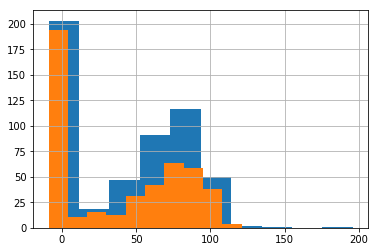

In [26]:
#counts the amount of unique values in column NetFractionInstallBurden
print("The number of distinct values is: ", len(mySample.NetFractionInstallBurden.unique()))

#max value
print()
print("Max value: ", mySample.NetFractionInstallBurden.max())

#min value
print("Min value: ", mySample.NetFractionInstallBurden.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NetFractionInstallBurden'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NetFractionInstallBurden'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NetFractionInstallBurden'] == -7]))
print("Number of 0: ", len(mySample[mySample['NetFractionInstallBurden'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NetFractionInstallBurden.unique()) < 100:
        print("The unique values are: ", mySample.NetFractionInstallBurden.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['NetFractionInstallBurden'].unique())
#print()

#Dispersion of bad customers
#print("NetFractionInstallBurden from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NetFractionInstallBurden.value_counts())
mySample_badOnly.NetFractionInstallBurden.hist()
print()

#Dispersion of good customers
#print()
#print("NetFractionInstallBurden from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NetFractionInstallBurden.value_counts())
mySample_goodOnly.NetFractionInstallBurden.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

very odd dispersion with the -8. Graph makes it clear that while the % is common in both, the amount of people in each % is much higher for defaulters. Also some strange outliers there as this is out of 100%, yet some defaulters appear to owe more than that? While this could be categorical, there is a lot of questions about this column for now, suggesting it's better to not oversimplify until a proper analysis of the data has occurred

**21)NumRevolvingTradesWBalance:**
- or Number of Revolving Trades with Balance, is the number of credit card/overdraft style agreements where there is a remaining balance to pay.
- numerical(int64)

The number of distinct values is:  22

Max value:  25
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  17
Number of missing values(-7):  0
Number of 0:  27

The unique values are:  [ 3  4  1  6  2  9  5  7 13  0 -9  8 11 14 10 -8 15 12 20 16 21 25]

RiskPerformance
Bad     [1, 6, 2, 9, 5, 3, 4, 7, -9, 14, 10, 8, 0, -8,...
Good    [3, 4, 2, 5, 13, 6, 0, 1, 8, -9, 11, 9, 7, 10,...
Name: NumRevolvingTradesWBalance, dtype: object


Key: orange = good, blue = bad


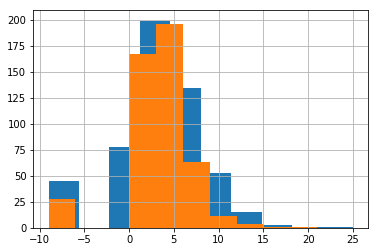

In [27]:
#counts the amount of unique values in column NumRevolvingTradesWBalance
print("The number of distinct values is: ", len(mySample.NumRevolvingTradesWBalance.unique()))

#max value
print()
print("Max value: ", mySample.NumRevolvingTradesWBalance.max())

#min value
print("Min value: ", mySample.NumRevolvingTradesWBalance.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumRevolvingTradesWBalance'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumRevolvingTradesWBalance'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumRevolvingTradesWBalance'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumRevolvingTradesWBalance'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumRevolvingTradesWBalance.unique()) < 100:
        print("The unique values are: ", mySample.NumRevolvingTradesWBalance.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['NumRevolvingTradesWBalance'].unique())
#print()

#Dispersion of bad customers
#print("NumRevolvingTradesWBalance from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumRevolvingTradesWBalance.value_counts())
mySample_badOnly.NumRevolvingTradesWBalance.hist()
print()

#Dispersion of good customers
#print()
#print("NumRevolvingTradesWBalance from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumRevolvingTradesWBalance.value_counts())
mySample_goodOnly.NumRevolvingTradesWBalance.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

There's a data pattern here in the graph that would be lost if changed to categorical so keep as continuous/numerical feature

**22)NumInstallTradesWBalance:**
- or Number of Installment Trades With Balance, is the number of term loan credit agreements with set repayment installments where there is a remaining balance left to pay.
- numerical(int64)

The number of distinct values is:  15

Max value:  19
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  105
Number of missing values(-7):  0
Number of 0:  0


NumInstallTradesWBalance from Defaulting Customers
 2     137
 1     127
 3      94
-8      54
 4      43
-9      29
 5      23
 7       7
 6       7
 8       4
 10      2
 19      1
 11      1
Name: NumInstallTradesWBalance, dtype: int64


NumInstallTradesWBalance from Good Customers
 2     140
 1     101
 3      78
-8      51
 4      38
-9      27
 5      14
 6      12
 8       4
 7       2
 14      2
 9       2
Name: NumInstallTradesWBalance, dtype: int64

Key: orange = good, blue = bad


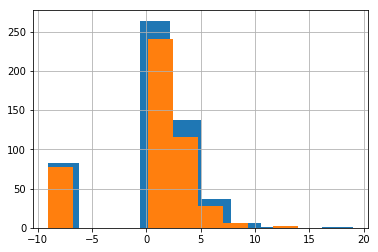

In [28]:
#counts the amount of unique values in column NumInstallTradesWBalance
print("The number of distinct values is: ", len(mySample.NumInstallTradesWBalance.unique()))

#max value
print()
print("Max value: ", mySample.NumInstallTradesWBalance.max())

#min value
print("Min value: ", mySample.NumInstallTradesWBalance.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumInstallTradesWBalance'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumInstallTradesWBalance'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumInstallTradesWBalance'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumInstallTradesWBalance'] == 0]))
print()

#prints the different unique values if there isn't tons
#if len(mySample.NumInstallTradesWBalance.unique()) < 100:
#        print("The unique values are: ", mySample.NumInstallTradesWBalance.unique())
        
#is there a cluster difference in values?
print()
#print(mySample.groupby('RiskPerformance')['NumInstallTradesWBalance'].unique())
#print()

#Dispersion of bad customers
print("NumInstallTradesWBalance from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
print(mySample_badOnly.NumInstallTradesWBalance.value_counts())
mySample_badOnly.NumInstallTradesWBalance.hist()
print()

#Dispersion of good customers
print()
print("NumInstallTradesWBalance from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
print(mySample_goodOnly.NumInstallTradesWBalance.value_counts())
mySample_goodOnly.NumInstallTradesWBalance.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: suggest change to category*

weird number of -8 (refused to identify) again here. Excluding that, there isn't any more information that can be extracted here that wouldn't be by bucketing/binning, particularly as the majority of people are between 0-2, or -8 

**23)NumBank2NatlTradesWHighUtilization:**
- or Number Bank/National Trades with High Utilitzation (subject to the slash “/” being replaced with a “2”), counts the number of credit cards on a consumer credit bureau report carrying a balance that is at 75% of its limit or greater. The ratio of balance to limit is referred to as “utilization”.
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  16

Max value:  15
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  54
Number of missing values(-7):  0
Number of 0:  395

The unique values are:  [ 0  1  3  5 -8  7  2 -9  4 10  6 11 15  9  8 13]

RiskPerformance
Bad     [0, 3, 5, 2, 1, -9, -8, 4, 10, 6, 11, 7, 15, 9...
Good                     [0, 1, -8, 7, 2, -9, 3, 5, 4, 6]
Name: NumBank2NatlTradesWHighUtilization, dtype: object


Key: orange = good, blue = bad


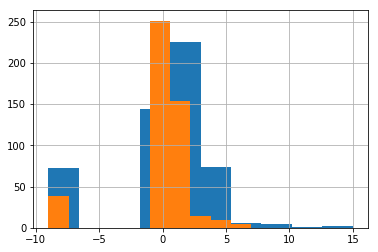

In [29]:
#counts the amount of unique values in column NumBank2NatlTradesWHighUtilization
print("The number of distinct values is: ", len(mySample.NumBank2NatlTradesWHighUtilization.unique()))

#max value
print()
print("Max value: ", mySample.NumBank2NatlTradesWHighUtilization.max())

#min value
print("Min value: ", mySample.NumBank2NatlTradesWHighUtilization.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['NumBank2NatlTradesWHighUtilization'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['NumBank2NatlTradesWHighUtilization'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['NumBank2NatlTradesWHighUtilization'] == -7]))
print("Number of 0: ", len(mySample[mySample['NumBank2NatlTradesWHighUtilization'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.NumBank2NatlTradesWHighUtilization.unique()) < 100:
        print("The unique values are: ", mySample.NumBank2NatlTradesWHighUtilization.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['NumBank2NatlTradesWHighUtilization'].unique())
#print()

#Dispersion of bad customers
#print("NumBank2NatlTradesWHighUtilization from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.NumBank2NatlTradesWHighUtilization.value_counts())
mySample_badOnly.NumBank2NatlTradesWHighUtilization.hist()
print()

#Dispersion of good customers
#print()
#print("NumBank2NatlTradesWHighUtilization from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.NumBank2NatlTradesWHighUtilization.value_counts())
mySample_goodOnly.NumBank2NatlTradesWHighUtilization.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

Clear pattern of more people with missing data, or refused to give data here ended up being 'bad' or defaulting, as well as having a higher number of accounts near their limit. Could be very useful for analysis so don't want to simplify by changing from continuous/numerical

**24)PercentTradesWBalance:**
- or Percent of Trades With Balance, is the % of the total credit agreements a customer has open that have any amount left to pay off.
- numerical(int64)
- beware of -7 if none exist, -8 or -9

The number of distinct values is:  81

Max value:  100
Min value:  -9
Number of missing values(-9):  56
Number of missing values(-8):  5
Number of missing values(-7):  0
Number of 0:  8

The unique values are:  [ 44  50  40  45  33  88 100  67  60  82  43  90  72  71  89  31  93  36
   0  -9  54  80  75  59  65  13  78  63  55  70  85  56  83  41  46  52
  11  20  92  68  25  29  69  57  94  79  64  42  86  77  38  53  81  18
  30  91  73  87  47  61  74  96  62  -8  21  27  58  48  17  22  76  84
   9  37  32  39  35  23  14  12  10]

RiskPerformance
Bad     [40, 45, 33, 50, 88, 67, 82, 43, 90, 71, 36, -...
Good    [44, 50, 100, 60, 33, 72, 89, 31, 67, 93, 0, 5...
Name: PercentTradesWBalance, dtype: object


Key: orange = good, blue = bad


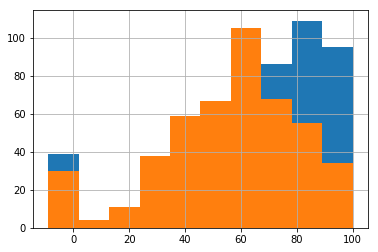

In [30]:
#counts the amount of unique values in column PercentTradesWBalance
print("The number of distinct values is: ", len(mySample.PercentTradesWBalance.unique()))

#max value
print()
print("Max value: ", mySample.PercentTradesWBalance.max())

#min value
print("Min value: ", mySample.PercentTradesWBalance.min())

#How many missing?
print("Number of missing values(-9): ", len(mySample[mySample['PercentTradesWBalance'] == -9]))
print("Number of missing values(-8): ", len(mySample[mySample['PercentTradesWBalance'] == -8]))
print("Number of missing values(-7): ", len(mySample[mySample['PercentTradesWBalance'] == -7]))
print("Number of 0: ", len(mySample[mySample['PercentTradesWBalance'] == 0]))
print()

#prints the different unique values if there isn't tons
if len(mySample.PercentTradesWBalance.unique()) < 100:
        print("The unique values are: ", mySample.PercentTradesWBalance.unique())
        
#is there a cluster difference in values?
print()
print(mySample.groupby('RiskPerformance')['PercentTradesWBalance'].unique())
#print()

#Dispersion of bad customers
#print("PercentTradesWBalance from Defaulting Customers")
mySample_badOnly = mySample[mySample.RiskPerformance == 'Bad']
#print(mySample_badOnly.PercentTradesWBalance.value_counts())
mySample_badOnly.PercentTradesWBalance.hist()
print()

#Dispersion of good customers
#print()
#print("PercentTradesWBalance from Good Customers")
mySample_goodOnly = mySample[mySample.RiskPerformance == 'Good']
#print(mySample_goodOnly.PercentTradesWBalance.value_counts())
mySample_goodOnly.PercentTradesWBalance.hist()

print()
print("Key: orange = good, blue = bad")

*Conclusion: continuous*

Clear indication that 'good' customers have ~20% less balance to pay on average visually on graph. While clear steps, still do not want to lose comparison detail, so keep continuous

**Decision Summary:**

1) Risk Performance: category

7) NumTrades60Ever2DerogPubRec: suggest change to category

8) NumTrades90Ever2DerogPubRec: suggest change to categorical

10) MSinceMostRecentDelq: suggest change to category

16) MSinceMostRecentInqexcl7days: suggest change to category

17) NumInqLast6M: suggest change to category

18) NumInqLast6Mexcl7days: suggest change to category

22) NumInstallTradesWBalance: suggest change to category

2) ExternalRiskEstimate: continuous

3) MSinceOldestTradeOpen: continuous

4) MSinceMostRecentTradeOpen: continuous

5) AverageMInFile: continuous

6) NumSatisfactoryTrades: continuous

9) PercentTradesNeverDelq: continuous

11) MaxDelq2PublicRecLast12M: continuous

12) MaxDelqEver: continuous

13) NumTotalTrades: continuous

14) NumTradesOpeninLast12M: continuous

15) PercentInstallTrades: continuous

19) NetFractionRevolvingBurden: continuous

20) NetFractionInstallBurden: continuous

21) NumRevolvingTradesWBalance: continuous

23) NumBank2NatlTradesWHighUtilization: continuous

24) PercentTradesWBalance: continuous

# **Drop Duplicate Rows and/or Columns**

##### Checks for duplicated rows using a primary key
print(mySample.set_index('primaryKeyName').index.get_duplicates())

##### Checks for duplicated columns using the primary key column
print(mySample.set_index('primaryKeyName').index.T.get_duplicates())

Or at least that code would, if there were any fields to use as a primary key. However, as this was a sample provided online, all remnants of unique identifiers were removed, and without any column and value set that guarantees a unique value per row in the data set, these operations will not work. We must therefore move up a level, and treat an entire row as the only way to uniquly identify a row. This does come with some risk that different entries could have the same values yet be deleted. We must also keep in mind that 56 rows are missing every entry bar the outcome, meaning that up to 56 rows could be treated as duplicates depending on the outcome

In [31]:
mySample.duplicated(subset=None, keep='first').value_counts()

False    946
True      54
dtype: int64

Keeping in mind that the first instance of -9 row that had the outcome true, and the first instance of a -9 row with the outcome false would not be included, it appears to have only flagged the rows that are missing all data bar the outcome as duplicates. No other row is entirely duplicated, which matches up with what the provider of the sample data online stated.

In [32]:
#Double check there isn't value in missing information e.g. everyone missing data defaulted
minus9rows = mySample[mySample['NumBank2NatlTradesWHighUtilization'] == -9]
minus9rows.RiskPerformance.value_counts()

Bad     29
Good    27
Name: RiskPerformance, dtype: int64

In [33]:
#To remove confirmed duplicate/fully missing data rows:
mySample_cleaned = mySample.drop_duplicates()

#double check duplicates are gone
mySample_cleaned.duplicated(subset=None, keep='first').value_counts()

#remove last 2 -9 rows counted as non-duplicates
#doesn't return row if condition -9 value in column where should be none
mySample_cleaned = mySample_cleaned[mySample_cleaned.PercentTradesWBalance != -9]

# **Drop Constant Columns**

As we have seen from the initial data investigation, there are no constant columns. However, if there were, the code shown below would search for any column where the different number of values equals 1, and remove that column (also increment the amount the dropped columns counter is at). As there is no constants, the output is 0, as zero columns were found to be constant, and thus 0 were dropped

In [34]:
dropCount = 0
for col in mySample.columns:
    if len(mySample[col].unique()) == 1:
        mySample.drop(col,inplace=True,axis=1)
        dropCount += 1
print(dropCount)

0


# **Save your updated/cleaned data frame to a new csv file**

In [35]:
#Save to csv
mySample_cleaned.to_csv('CreditRisk18206383-cleaned1.csv', index=False)

# **(1) Second Section**

In [36]:
#read csv file
mySample_cleaned1 = pd.read_csv('CreditRisk18206383-cleaned1.csv')

#print num of rows and columns
print("cleaned csv file has", mySample_cleaned1.shape[0], "rows and", mySample_cleaned1.shape[1], "columns.")
print()

cleaned csv file has 944 rows and 24 columns.



**change suggested categorical data to categorical for analysis**

In [37]:
import numpy as np

#7)NumTrades60Ever2DerogPubRec
try:
    bins = [0, 1, 3, 6, np.inf]
    labels = ['Never', 'OnceOrTwice', '3-5', '6+']

    mySample_cleaned1['NumTrades60Ever2DerogPubRec'] = pd.cut(mySample_cleaned1['NumTrades60Ever2DerogPubRec'], bins, labels=labels)
except:
    print("Already changed to categorical!")

In [38]:
#8)NumTrades90Ever2DerogPubRec
try:
    bins = [0, 1, 3, 6, np.inf]
    labels = ['Never', 'OnceOrTwice', '3-5', '6+']

    mySample_cleaned1['NumTrades90Ever2DerogPubRec'] = pd.cut(mySample_cleaned1['NumTrades90Ever2DerogPubRec'], bins, labels=labels)
except:
    print("Already changed to categorical!")

Above was easy to break into bins due to very few differences in the data. However, some of the below datasets may need a stronger decision when it comes to how to break the continuous data into categories/buckets.

1)  Find the smallest and largest data point

2) Lower the minimum a little and raise the maximum a little (e.g. 1.2 becomes 1, and 99.9 becomes 100)

3) Decide how many bins you need
- Bins should be all the same size
- Bins should include all of the data
- Boundaries for bins should land at whole numbers whenever possible 
- Choose between 5 and 20 bins. The larger the data set, the more likely you’ll want a large number of bins (if unsure, total nums/no of bins = amount per bin - is this 'too much' of the total dataset in one bucket?). Can also use numOfBins = 1+ 3.322log*noOfObservationsInSet (Sturges Rule)
- If at all possible, try to make your data set evenly divisible by the number of bins. For example, if you have 10 pieces of data, work with 5 bins instead of 6 or 7

4) Divide your range (the numbers in your data set) by the bin size 

In [39]:
#10) MSinceMostRecentDelq
#Max value:  80
#Min value:  -9
#Number of missing values(-9):  56 (unknown)
#Number of missing values(-8):  10 (unknown)
#Number of missing values(-7):  450 (never)
#Number of 0:  7 (in last month)

#0-80 excluding never and unknown. 8 bins? 80/8 = approx range 10 per bucket or (bins = 1+3.322(log)(946) = ~494? not using)
#despite using a scientific method, I adjusted it based on human understanding of years, and where the data visually pooled
try:    
    bins = [-9,-7, 0, 1, 7, 13, 25, np.inf]
    labels = ['Unknown', 'Never', 'InLastMonth', 'InLast6Months', '6-12months','LastYear','2years+']

    mySample_cleaned1['MSinceMostRecentDelq'] = pd.cut(mySample_cleaned1['MSinceMostRecentDelq'], bins, labels=labels)
except:
    print("Already changed to categorical!")

In [40]:
#16) MSinceMostRecentInqexcl7days: suggest change to category
#Max value:  24
#Min value:  -9
#Number of missing values(-9):  56
#Number of missing values(-8):  47
#Number of missing values(-7):  187
#Number of 0:  431

#similar to 10) but about inquiries instead of delinquencies and missing 7 days
try:    
    bins = [-9,-7, 0, 1, 7, 13, 25, np.inf]
    labels = ['Unknown', 'Never', 'InLastMonth', 'InLast6Months', '6-12months','LastYear','2years+']

    mySample_cleaned1['MSinceMostRecentInqexcl7days'] = pd.cut(mySample_cleaned1['MSinceMostRecentInqexcl7days'], bins, labels=labels)
except:
    print("Already changed to categorical!")

In [41]:
#17) NumInqLast6M: suggest change to category
#Max value:  17
#Min value:  -9
#Number of missing values(-9):  56
#Number of missing values(-8):  0
#Number of missing values(-7):  0
#Number of 0:  367
try:
    bins = [ -9, 0, 1, 3, 6, 11, np.inf]
    labels = ['unknown', 'noInqueryMade', 'OneOrTwo', 'UpTo5', 'UpTo10', 'Over10']

    mySample_cleaned1['NumInqLast6M'] = pd.cut(mySample_cleaned1['NumInqLast6M'], bins, labels=labels)
except:
    print("Already changed to categorical!")

In [42]:
#18) NumInqLast6Mexcl7days: suggest change to category
#Max value:  14
#Min value:  -9
#Number of missing values(-9):  56
#Number of missing values(-8):  0
#Number of missing values(-7):  0
#Number of 0:  374
try:    
    bins = [ -9, 0, 1, 3, 6, 11, np.inf]
    labels = ['unknown', 'noInqueryMade', 'OneOrTwo', 'UpTo5', 'UpTo10', 'Over10']

    mySample_cleaned1['NumInqLast6Mexcl7days'] = pd.cut(mySample_cleaned1['NumInqLast6Mexcl7days'], bins, labels=labels)
except:
    print("Already changed to categorical!")

In [43]:
#22) NumInstallTradesWBalance: suggest change to category
#Max value:  19
#Min value:  -9
#Number of missing values(-9):  56
#Number of missing values(-8):  105
#Number of missing values(-7):  0
#Number of 0:  0

#quite a good few missing, most values outside this in 0 or 1-3 range, >5 rare 
try:
    bins = [-9, 0, 1, 2, 3, 4, 5, np.inf]
    labels = ['unknown', 'None', '1', '2', '3', '4', '5OrMore']

    mySample_cleaned1['NumInstallTradesWBalance'] = pd.cut(mySample_cleaned1['NumInstallTradesWBalance'], bins, labels=labels)
except:
    print("Already changed to categorical!")

In [44]:
#print to make sure it worked
mySample_cleaned1.dtypes

RiskPerformance                         object
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec           category
NumTrades90Ever2DerogPubRec           category
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                  category
MaxDelq2PublicRecLast12M                 int64
MaxDelqEver                              int64
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days          category
NumInqLast6M                          category
NumInqLast6Mexcl7days                 category
NetFractionRevolvingBurden               int64
NetFractionInstallBurden                 int64
NumRevolvingTradesWBalance               int64
NumInstallTra

The raw data is now ready for processing. For now, there will be no derived features (this may change after analysis)

In [45]:
#Any missing data?
mySample_cleaned1.isnull().sum()

RiskPerformance                         0
ExternalRiskEstimate                    0
MSinceOldestTradeOpen                   0
MSinceMostRecentTradeOpen               0
AverageMInFile                          0
NumSatisfactoryTrades                   0
NumTrades60Ever2DerogPubRec           637
NumTrades90Ever2DerogPubRec           728
PercentTradesNeverDelq                  0
MSinceMostRecentDelq                    0
MaxDelq2PublicRecLast12M                0
MaxDelqEver                             0
NumTotalTrades                          0
NumTradesOpeninLast12M                  0
PercentInstallTrades                    0
MSinceMostRecentInqexcl7days            0
NumInqLast6M                            0
NumInqLast6Mexcl7days                   0
NetFractionRevolvingBurden              0
NetFractionInstallBurden                0
NumRevolvingTradesWBalance              0
NumInstallTradesWBalance                0
NumBank2NatlTradesWHighUtilization      0
PercentTradesWBalance             

For NumTrades90Ever2DerogPubRec, 728 of 730 are 0, not missing. Only flagged 2 other values? Known 56 missing values....need a different method as null is represented by -9 or -8, not 0 or null

In [46]:
print("Actual number of missing values:")

#RiskPerformance
print("RiskPerformance: none (already known as part of data source investigation)")

#ExternalRiskEstimate
ExternalRiskEstimateMissing = len(mySample_cleaned1[mySample_cleaned1['ExternalRiskEstimate'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['ExternalRiskEstimate'] == -8])
ExternalRiskEstimateMissingPercent = float('%.1f'%(ExternalRiskEstimateMissing / mySample_cleaned1.shape[0] * 100))
print("ExternalRiskEstimate: ", ExternalRiskEstimateMissing, " rows, ", ExternalRiskEstimateMissingPercent, "%")

#MSinceOldestTradeOpen
MSinceOldestTradeOpenMissing = len(mySample_cleaned1[mySample_cleaned1['MSinceOldestTradeOpen'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['MSinceOldestTradeOpen'] == -8])
MSinceOldestTradeOpenMissingPercent = float('%.1f'%(MSinceOldestTradeOpenMissing / mySample_cleaned1.shape[0] * 100))
print("MSinceOldestTradeOpen: ", MSinceOldestTradeOpenMissing, " rows, ", MSinceOldestTradeOpenMissingPercent, "%")

#MSinceMostRecentTradeOpen
MSinceMostRecentTradeOpenMissing = len(mySample_cleaned1[mySample_cleaned1['MSinceMostRecentTradeOpen'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['MSinceMostRecentTradeOpen'] == -8])
MSinceMostRecentTradeOpenMissingPercent = float('%.1f'%(MSinceMostRecentTradeOpenMissing / mySample_cleaned1.shape[0] * 100))
print("MSinceMostRecentTradeOpen: ", MSinceMostRecentTradeOpenMissing, " rows, ", MSinceMostRecentTradeOpenMissingPercent, "%")

#AverageMInFile
AverageMInFileMissing = len(mySample_cleaned1[mySample_cleaned1['AverageMInFile'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['AverageMInFile'] == -8])
AverageMInFileMissingPercent = float('%.1f'%(AverageMInFileMissing / mySample_cleaned1.shape[0] * 100))
print("AverageMInFile: ", AverageMInFileMissing, " rows, ", AverageMInFileMissingPercent, "%")

#NumSatisfactoryTrades
NumSatisfactoryTradesMissing = len(mySample_cleaned1[mySample_cleaned1['NumSatisfactoryTrades'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumSatisfactoryTrades'] == -8])
NumSatisfactoryTradesMissingPercent = float('%.1f'%(NumSatisfactoryTradesMissing / mySample_cleaned1.shape[0] * 100))
print("NumSatisfactoryTrades: ", NumSatisfactoryTradesMissing, " rows, ", NumSatisfactoryTradesMissingPercent, "%")

#NumTrades60Ever2DerogPubRec
NumTrades60Ever2DerogPubRecMissing = len(mySample_cleaned1[mySample_cleaned1['NumTrades60Ever2DerogPubRec'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumTrades60Ever2DerogPubRec'] == -8])
NumTrades60Ever2DerogPubRecMissingPercent = float('%.1f'%(NumTrades60Ever2DerogPubRecMissing / mySample_cleaned1.shape[0] * 100))
print("NumTrades60Ever/DerogPubRec: ", NumTrades60Ever2DerogPubRecMissing, " rows, ", NumTrades60Ever2DerogPubRecMissingPercent, "%")

#NumTrades90Ever2DerogPubRec
NumTrades90Ever2DerogPubRecMissing = len(mySample_cleaned1[mySample_cleaned1['NumTrades90Ever2DerogPubRec'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumTrades90Ever2DerogPubRec'] == -8])
NumTrades90Ever2DerogPubRecMissingPercent = float('%.1f'%(NumTrades90Ever2DerogPubRecMissing / mySample_cleaned1.shape[0] * 100))
print("NumTrades90Ever/DerogPubRec: ", NumTrades90Ever2DerogPubRecMissing, " rows, ", NumTrades90Ever2DerogPubRecMissingPercent, "%")

#PercentTradesNeverDelq
PercentTradesNeverDelqMissing = len(mySample_cleaned1[mySample_cleaned1['PercentTradesNeverDelq'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['PercentTradesNeverDelq'] == -8])
PercentTradesNeverDelqMissingPercent = float('%.1f'%(PercentTradesNeverDelqMissing / mySample_cleaned1.shape[0] * 100))
print("PercentTradesNeverDelq: ", PercentTradesNeverDelqMissing, " rows, ", PercentTradesNeverDelqMissingPercent, "%")

#MSinceMostRecentDelq
MSinceMostRecentDelqMissing = len(mySample_cleaned1[mySample_cleaned1['MSinceMostRecentDelq'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['MSinceMostRecentDelq'] == -8])
MSinceMostRecentDelqMissingPercent = float('%.1f'%(MSinceMostRecentDelqMissing / mySample_cleaned1.shape[0] * 100))
print("MSinceMostRecentDelq: ", MSinceMostRecentDelqMissing, " rows, ", MSinceMostRecentDelqMissingPercent, "%")

#MaxDelq2PublicRecLast12M
MaxDelq2PublicRecLast12MMissing = len(mySample_cleaned1[mySample_cleaned1['MaxDelq2PublicRecLast12M'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['MaxDelq2PublicRecLast12M'] == -8])
MaxDelq2PublicRecLast12MMissingPercent = float('%.1f'%(MaxDelq2PublicRecLast12MMissing / mySample_cleaned1.shape[0] * 100))
print("MaxDelq2PublicRecLast12M: ", MaxDelq2PublicRecLast12MMissing, " rows, ", MaxDelq2PublicRecLast12MMissingPercent, "%")

#MaxDelqEver
MaxDelqEverMissing = len(mySample_cleaned1[mySample_cleaned1['MaxDelqEver'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['MaxDelqEver'] == -8])
MaxDelqEverMissingPercent = float('%.1f'%(MaxDelqEverMissing / mySample_cleaned1.shape[0] * 100))
print("NMaxDelqEver: ", MaxDelqEverMissing, " rows, ", MaxDelqEverMissingPercent, "%")

#NumTotalTrades
NumTotalTradesMissing = len(mySample_cleaned1[mySample_cleaned1['NumTotalTrades'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumTotalTrades'] == -8])
NumTotalTradesMissingPercent = float('%.1f'%(NumTotalTradesMissing / mySample_cleaned1.shape[0] * 100))
print("NumTotalTrades: ", NumTotalTradesMissing, " rows, ", NumTotalTradesMissingPercent, "%")

#NumTradesOpeninLast12M
NumTradesOpeninLast12MMissing = len(mySample_cleaned1[mySample_cleaned1['NumTradesOpeninLast12M'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumTradesOpeninLast12M'] == -8])
NumTradesOpeninLast12MMissingPercent = float('%.1f'%(NumTradesOpeninLast12MMissing / mySample_cleaned1.shape[0] * 100))
print("NumTradesOpeninLast12M: ", NumTradesOpeninLast12MMissing, " rows, ", NumTradesOpeninLast12MMissingPercent, "%")

#PercentInstallTrades
PercentInstallTradesMissing = len(mySample_cleaned1[mySample_cleaned1['PercentInstallTrades'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['PercentInstallTrades'] == -8])
PercentInstallTradesMissingPercent = float('%.1f'%(PercentInstallTradesMissing / mySample_cleaned1.shape[0] * 100))
print("PercentInstallTrades: ", PercentInstallTradesMissing, " rows, ", PercentInstallTradesMissingPercent, "%")

#MSinceMostRecentInqexcl7days
MSinceMostRecentInqexcl7daysMissing = len(mySample_cleaned1[mySample_cleaned1['MSinceMostRecentInqexcl7days'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['MSinceMostRecentInqexcl7days'] == -8])
MSinceMostRecentInqexcl7daysMissingPercent = float('%.1f'%(MSinceMostRecentInqexcl7daysMissing / mySample_cleaned1.shape[0] * 100))
print("MSinceMostRecentInqexcl7days: ", MSinceMostRecentInqexcl7daysMissing, " rows, ", MSinceMostRecentInqexcl7daysMissingPercent, "%")

#NumInqLast6M
NumInqLast6MMissing = len(mySample_cleaned1[mySample_cleaned1['NumInqLast6M'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumInqLast6M'] == -8])
NumInqLast6MMissingPercent = float('%.1f'%(NumInqLast6MMissing / mySample_cleaned1.shape[0] * 100))
print("NumInqLast6M: ", NumInqLast6MMissing, " rows, ", NumInqLast6MMissingPercent, "%")

#NumInqLast6Mexcl7days
NumInqLast6Mexcl7daysMissing = len(mySample_cleaned1[mySample_cleaned1['NumInqLast6Mexcl7days'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumInqLast6Mexcl7days'] == -8])
NumInqLast6Mexcl7daysMissingPercent = float('%.1f'%(NumInqLast6Mexcl7daysMissing / mySample_cleaned1.shape[0] * 100))
print("NumInqLast6Mexcl7days: ", NumInqLast6Mexcl7daysMissing, " rows, ", NumInqLast6Mexcl7daysMissingPercent, "%")

#NetFractionRevolvingBurden
NetFractionRevolvingBurdenMissing = len(mySample_cleaned1[mySample_cleaned1['NetFractionRevolvingBurden'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NetFractionRevolvingBurden'] == -8])
NetFractionRevolvingBurdenMissingPercent = float('%.1f'%(NetFractionRevolvingBurdenMissing / mySample_cleaned1.shape[0] * 100))
print("NetFractionRevolvingBurden: ", NetFractionRevolvingBurdenMissing, " rows, ", NetFractionRevolvingBurdenMissingPercent, "%")

#NetFractionInstallBurden
NetFractionInstallBurdenMissing = len(mySample_cleaned1[mySample_cleaned1['NetFractionInstallBurden'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NetFractionInstallBurden'] == -8])
NetFractionInstallBurdenMissingPercent = float('%.1f'%(NetFractionInstallBurdenMissing / mySample_cleaned1.shape[0] * 100))
print("NetFractionInstallBurden: ", NetFractionInstallBurdenMissing, " rows, ", NetFractionInstallBurdenMissingPercent, "%")

#NumRevolvingTradesWBalance
NumRevolvingTradesWBalanceMissing = len(mySample_cleaned1[mySample_cleaned1['NumRevolvingTradesWBalance'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumRevolvingTradesWBalance'] == -8])
NumRevolvingTradesWBalanceMissingPercent = float('%.1f'%(NumRevolvingTradesWBalanceMissing / mySample_cleaned1.shape[0] * 100))
print("NumRevolvingTradesWBalance: ", NumRevolvingTradesWBalanceMissing, " rows, ", NumRevolvingTradesWBalanceMissingPercent, "%")

#NumInstallTradesWBalance
NumInstallTradesWBalanceMissing = len(mySample_cleaned1[mySample_cleaned1['NumInstallTradesWBalance'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumInstallTradesWBalance'] == -8])
NumInstallTradesWBalanceMissingPercent = float('%.1f'%(NumInstallTradesWBalanceMissing / mySample_cleaned1.shape[0] * 100))
print("NumInstallTradesWBalance: ", NumInstallTradesWBalanceMissing, " rows, ", NumInstallTradesWBalanceMissingPercent, "%")

#NumBank2NatlTradesWHighUtilization
NumBank2NatlTradesWHighUtilizationMissing = len(mySample_cleaned1[mySample_cleaned1['NumBank2NatlTradesWHighUtilization'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['NumBank2NatlTradesWHighUtilization'] == -8])
NumBank2NatlTradesWHighUtilizationMissingPercent = float('%.1f'%(NumBank2NatlTradesWHighUtilizationMissing / mySample_cleaned1.shape[0] * 100))
print("NumBank/NatlTradesWHighUtilization: ", NumBank2NatlTradesWHighUtilizationMissing, " rows, ", NumBank2NatlTradesWHighUtilizationMissingPercent, "%")

#PercentTradesWBalance
PercentTradesWBalanceMissing = len(mySample_cleaned1[mySample_cleaned1['PercentTradesWBalance'] == -9]) + len(mySample_cleaned1[mySample_cleaned1['PercentTradesWBalance'] == -8])
PercentTradesWBalanceMissingPercent = float('%.1f'%(PercentTradesWBalanceMissing / mySample_cleaned1.shape[0] * 100))
print("PercentTradesWBalance: ", PercentTradesWBalanceMissing, " rows, ", PercentTradesWBalanceMissingPercent, "%")

Actual number of missing values:
RiskPerformance: none (already known as part of data source investigation)
ExternalRiskEstimate:  4  rows,  0.4 %
MSinceOldestTradeOpen:  34  rows,  3.6 %
MSinceMostRecentTradeOpen:  0  rows,  0.0 %
AverageMInFile:  0  rows,  0.0 %
NumSatisfactoryTrades:  0  rows,  0.0 %
NumTrades60Ever/DerogPubRec:  0  rows,  0.0 %
NumTrades90Ever/DerogPubRec:  0  rows,  0.0 %
PercentTradesNeverDelq:  0  rows,  0.0 %
MSinceMostRecentDelq:  0  rows,  0.0 %
MaxDelq2PublicRecLast12M:  0  rows,  0.0 %
NMaxDelqEver:  0  rows,  0.0 %
NumTotalTrades:  0  rows,  0.0 %
NumTradesOpeninLast12M:  0  rows,  0.0 %
PercentInstallTrades:  0  rows,  0.0 %
MSinceMostRecentInqexcl7days:  0  rows,  0.0 %
NumInqLast6M:  0  rows,  0.0 %
NumInqLast6Mexcl7days:  0  rows,  0.0 %
NetFractionRevolvingBurden:  18  rows,  1.9 %
NetFractionInstallBurden:  326  rows,  34.5 %
NumRevolvingTradesWBalance:  17  rows,  1.8 %
NumInstallTradesWBalance:  0  rows,  0.0 %
NumBank/NatlTradesWHighUtilization:  

Barring NetFractionInstallBurden, all percentages of missing data are easily replaced with averages. For NetFractionInstallBurden, the average over so many rows will debatabely skew the data too much. If it shows a significant trend, replace good customers with their average and bad customers with the bad customer average (to try and preserve and difference), else just remove the column as the information entropy will be too low and trends may be synthesized by adding averages to the dataset

# **Prepare a table with descriptive statistics for all the continuous features**

In [47]:
#Keep only the numeric features.
numeric_columns = mySample_cleaned1.select_dtypes(['int64', 'float64']).columns

In [48]:
#prints stats for the numeric columns (int64)
mySample_cleaned1.select_dtypes(['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,944.0,71.738347,11.051234,-9.0,65.0,72.0,80.00,94.0
MSinceOldestTradeOpen,944.0,195.483051,105.323487,-8.0,130.0,181.0,258.00,589.0
MSinceMostRecentTradeOpen,944.0,9.846398,15.241942,0.0,3.0,6.0,11.00,184.0
AverageMInFile,944.0,79.834746,35.913650,6.0,58.0,76.0,96.00,273.0
NumSatisfactoryTrades,944.0,21.611229,12.049576,1.0,13.0,20.0,29.00,74.0
PercentTradesNeverDelq,944.0,92.345339,11.425976,33.0,89.0,97.0,100.00,100.0
MaxDelq2PublicRecLast12M,944.0,5.733051,1.696709,0.0,5.0,6.0,7.00,9.0
MaxDelqEver,944.0,6.358051,1.893500,2.0,6.0,6.0,8.00,8.0
NumTotalTrades,944.0,23.024364,13.231940,0.0,14.0,21.0,31.00,77.0
NumTradesOpeninLast12M,944.0,1.954449,1.814003,0.0,1.0,2.0,3.00,10.0


In [49]:
#average value for each numeric feature only
mySample_cleaned1.mean()

ExternalRiskEstimate                   71.738347
MSinceOldestTradeOpen                 195.483051
MSinceMostRecentTradeOpen               9.846398
AverageMInFile                         79.834746
NumSatisfactoryTrades                  21.611229
PercentTradesNeverDelq                 92.345339
MaxDelq2PublicRecLast12M                5.733051
MaxDelqEver                             6.358051
NumTotalTrades                         23.024364
NumTradesOpeninLast12M                  1.954449
PercentInstallTrades                   33.490466
NetFractionRevolvingBurden             33.582627
NetFractionInstallBurden               42.559322
NumRevolvingTradesWBalance              3.880297
NumBank2NatlTradesWHighUtilization      0.599576
PercentTradesWBalance                  65.698093
dtype: float64

In [50]:
#standard deviation from the average for each numeric feature only
mySample_cleaned1.std()

ExternalRiskEstimate                   11.051234
MSinceOldestTradeOpen                 105.323487
MSinceMostRecentTradeOpen              15.241942
AverageMInFile                         35.913650
NumSatisfactoryTrades                  12.049576
PercentTradesNeverDelq                 11.425976
MaxDelq2PublicRecLast12M                1.696709
MaxDelqEver                             1.893500
NumTotalTrades                         13.231940
NumTradesOpeninLast12M                  1.814003
PercentInstallTrades                   17.939391
NetFractionRevolvingBurden             28.957598
NetFractionInstallBurden               42.095265
NumRevolvingTradesWBalance              3.367469
NumBank2NatlTradesWHighUtilization      2.626773
PercentTradesWBalance                  22.417161
dtype: float64

In [51]:
#mid-way value for each numeric feature only
mySample_cleaned1.median()

ExternalRiskEstimate                   72.0
MSinceOldestTradeOpen                 181.0
MSinceMostRecentTradeOpen               6.0
AverageMInFile                         76.0
NumSatisfactoryTrades                  20.0
PercentTradesNeverDelq                 97.0
MaxDelq2PublicRecLast12M                6.0
MaxDelqEver                             6.0
NumTotalTrades                         21.0
NumTradesOpeninLast12M                  2.0
PercentInstallTrades                   32.0
NetFractionRevolvingBurden             29.0
NetFractionInstallBurden               53.0
NumRevolvingTradesWBalance              3.0
NumBank2NatlTradesWHighUtilization      1.0
PercentTradesWBalance                  67.0
dtype: float64

In [52]:
#minimum value for each numeric feature only
mySample_cleaned1.min()

RiskPerformance                              Bad
ExternalRiskEstimate                          -9
MSinceOldestTradeOpen                         -8
MSinceMostRecentTradeOpen                      0
AverageMInFile                                 6
NumSatisfactoryTrades                          1
PercentTradesNeverDelq                        33
MSinceMostRecentDelq                     2years+
MaxDelq2PublicRecLast12M                       0
MaxDelqEver                                    2
NumTotalTrades                                 0
NumTradesOpeninLast12M                         0
PercentInstallTrades                           0
MSinceMostRecentInqexcl7days          6-12months
NumInqLast6M                            OneOrTwo
NumInqLast6Mexcl7days                   OneOrTwo
NetFractionRevolvingBurden                    -8
NetFractionInstallBurden                      -8
NumRevolvingTradesWBalance                    -8
NumInstallTradesWBalance                       1
NumBank2NatlTradesWH

In [53]:
#maximum value for each numeric feature only
mySample_cleaned1.max()

RiskPerformance                          Good
ExternalRiskEstimate                       94
MSinceOldestTradeOpen                     589
MSinceMostRecentTradeOpen                 184
AverageMInFile                            273
NumSatisfactoryTrades                      74
PercentTradesNeverDelq                    100
MSinceMostRecentDelq                  Unknown
MaxDelq2PublicRecLast12M                    9
MaxDelqEver                                 8
NumTotalTrades                             77
NumTradesOpeninLast12M                     10
PercentInstallTrades                      100
MSinceMostRecentInqexcl7days          Unknown
NumInqLast6M                          unknown
NumInqLast6Mexcl7days                 unknown
NetFractionRevolvingBurden                115
NetFractionInstallBurden                  196
NumRevolvingTradesWBalance                 25
NumInstallTradesWBalance              unknown
NumBank2NatlTradesWHighUtilization         15
PercentTradesWBalance             

In [54]:
print("Feature       [Unique Values]")
for column in numeric_columns:
    print(column, [str(len(mySample_cleaned1[column].unique()))])

Feature       [Unique Values]
ExternalRiskEstimate ['48']
MSinceOldestTradeOpen ['347']
MSinceMostRecentTradeOpen ['59']
AverageMInFile ['165']
NumSatisfactoryTrades ['63']
PercentTradesNeverDelq ['48']
MaxDelq2PublicRecLast12M ['9']
MaxDelqEver ['7']
NumTotalTrades ['67']
NumTradesOpeninLast12M ['11']
PercentInstallTrades ['76']
NetFractionRevolvingBurden ['105']
NetFractionInstallBurden ['107']
NumRevolvingTradesWBalance ['21']
NumBank2NatlTradesWHighUtilization ['15']
PercentTradesWBalance ['80']


# **Prepare a table with descriptive statistics for all the categorical features**

In [55]:
#keep only categorical features
categorical_columns = mySample_cleaned1.select_dtypes(['category']).columns

In [56]:
#prints stats for the categorical columns
mySample_cleaned1.select_dtypes(['category']).describe().T

,count,unique,top,freq
NumTrades60Ever2DerogPubRec,307,4,Never,183
NumTrades90Ever2DerogPubRec,216,4,Never,145
MSinceMostRecentDelq,944,7,Unknown,460
MSinceMostRecentInqexcl7days,944,6,Never,431
NumInqLast6M,944,6,unknown,367
NumInqLast6Mexcl7days,944,6,unknown,374
NumInstallTradesWBalance,944,7,1,277


# **Plot histograms for all the continuous features**

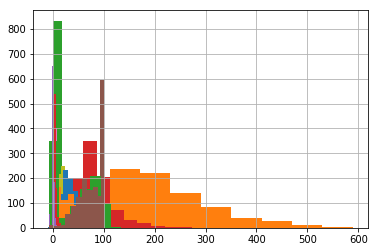

In [57]:
for column in numeric_columns:
    if mySample_cleaned1[column].dtype == 'int64' or mySample_cleaned1[column].dtype == 'float64':
        mySample_cleaned1[column].hist()

A bit too literal and crowded I think

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D6A79EF98>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

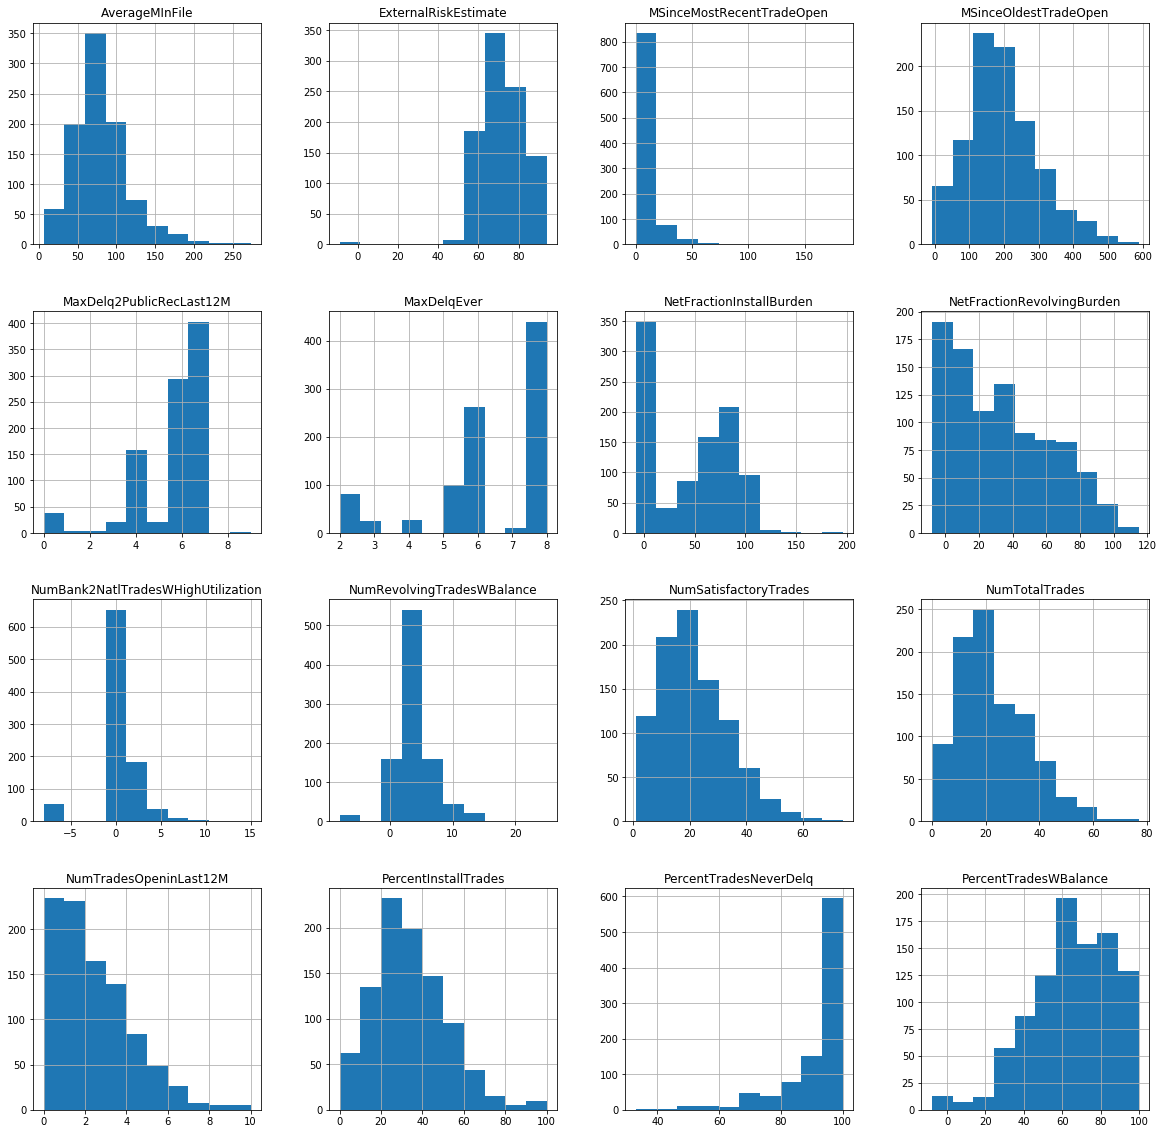

In [58]:
# For visualisation/plotting
import matplotlib.pyplot as plt
%matplotlib inline

#Plots all numeric features at same time
plt.figure()
mySample_cleaned1.hist(figsize=(20, 20))

# **Plot box plots for all the continuous features**

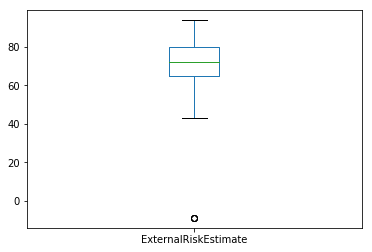

In [59]:
mySample_cleaned1['ExternalRiskEstimate'].plot(kind='box')

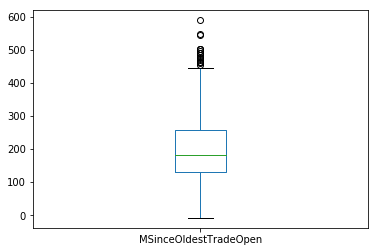

In [60]:
mySample_cleaned1['MSinceOldestTradeOpen'].plot(kind='box')

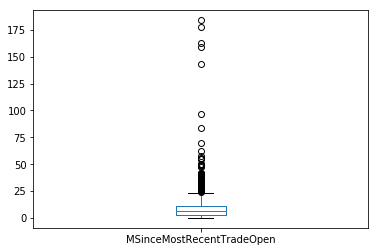

In [61]:
mySample_cleaned1['MSinceMostRecentTradeOpen'].plot(kind='box')

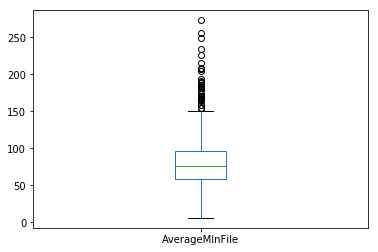

In [62]:
mySample_cleaned1['AverageMInFile'].plot(kind='box')

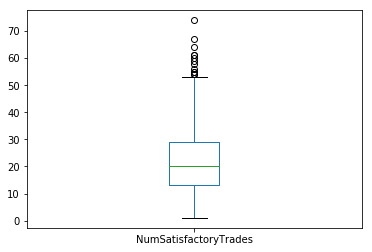

In [63]:
mySample_cleaned1['NumSatisfactoryTrades'].plot(kind='box')

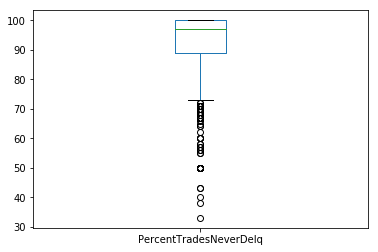

In [64]:
mySample_cleaned1['PercentTradesNeverDelq'].plot(kind='box')

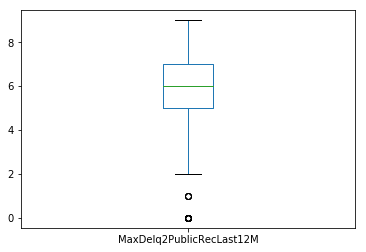

In [65]:
mySample_cleaned1['MaxDelq2PublicRecLast12M'].plot(kind='box')

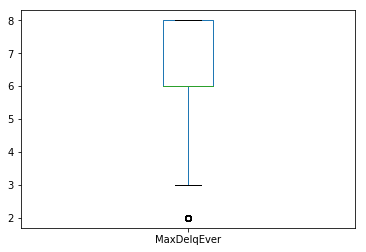

In [66]:
mySample_cleaned1['MaxDelqEver'].plot(kind='box')

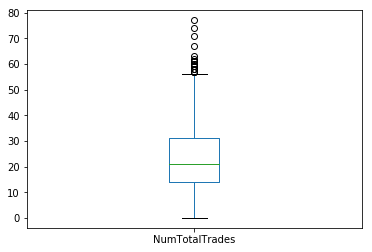

In [67]:
mySample_cleaned1['NumTotalTrades'].plot(kind='box')

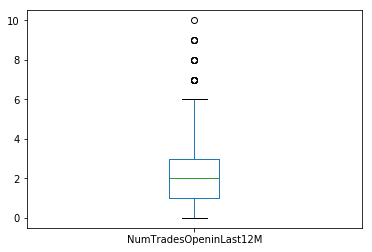

In [68]:
mySample_cleaned1['NumTradesOpeninLast12M'].plot(kind='box')

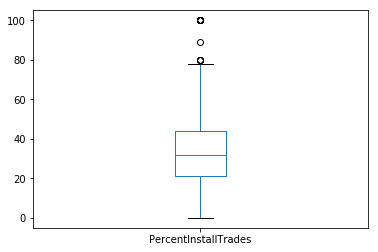

In [69]:
mySample_cleaned1['PercentInstallTrades'].plot(kind='box')

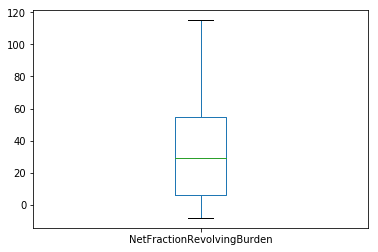

In [70]:
mySample_cleaned1['NetFractionRevolvingBurden'].plot(kind='box')

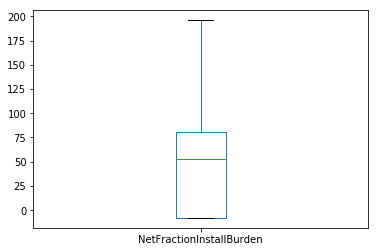

In [71]:
mySample_cleaned1['NetFractionInstallBurden'].plot(kind='box')

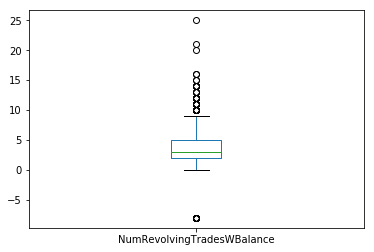

In [72]:
mySample_cleaned1['NumRevolvingTradesWBalance'].plot(kind='box')

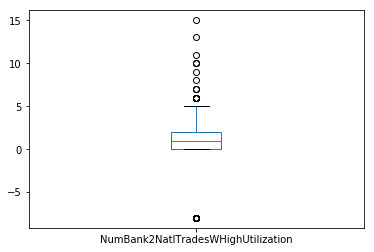

In [73]:
mySample_cleaned1['NumBank2NatlTradesWHighUtilization'].plot(kind='box')

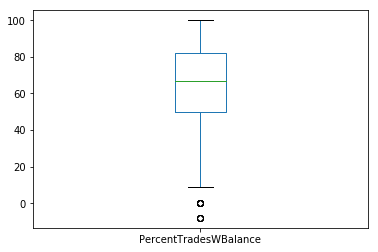

In [74]:
mySample_cleaned1['PercentTradesWBalance'].plot(kind='box')

# **Plot bar plots for all the categorical features**

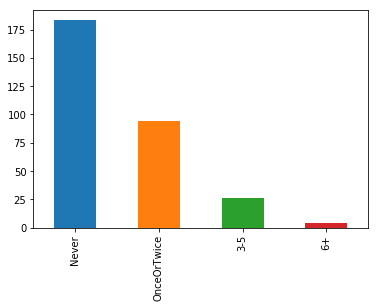

In [75]:
mySample_cleaned1['NumTrades60Ever2DerogPubRec'].value_counts().plot(kind='bar')

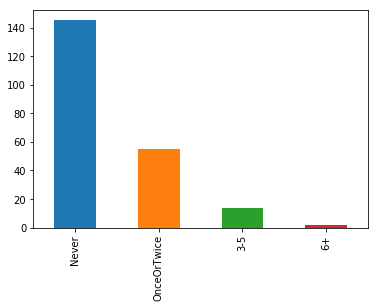

In [76]:
mySample_cleaned1['NumTrades90Ever2DerogPubRec'].value_counts().plot(kind='bar')

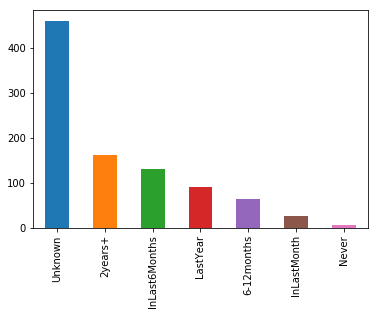

In [77]:
mySample_cleaned1['MSinceMostRecentDelq'].value_counts().plot(kind='bar')

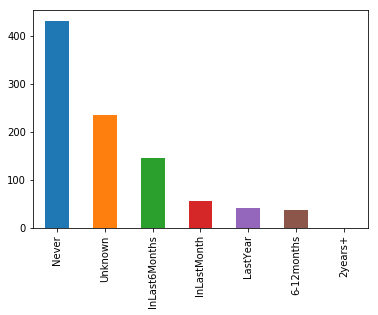

In [78]:
mySample_cleaned1['MSinceMostRecentInqexcl7days'].value_counts().plot(kind='bar')

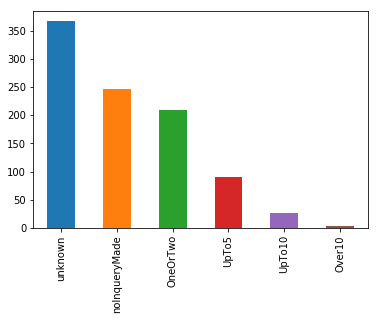

In [79]:
mySample_cleaned1['NumInqLast6M'].value_counts().plot(kind='bar')

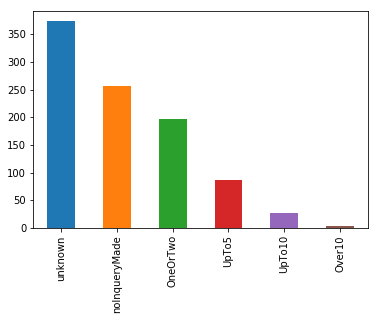

In [80]:
mySample_cleaned1['NumInqLast6Mexcl7days'].value_counts().plot(kind='bar')

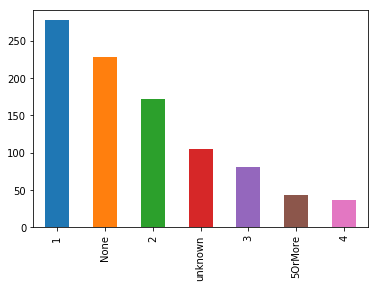

In [81]:
mySample_cleaned1['NumInstallTradesWBalance'].value_counts().plot(kind='bar')

## **Discuss your initial findings**

In [82]:
mySample_cleaned1.select_dtypes(['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,944.0,71.738347,11.051234,-9.0,65.0,72.0,80.00,94.0
MSinceOldestTradeOpen,944.0,195.483051,105.323487,-8.0,130.0,181.0,258.00,589.0
MSinceMostRecentTradeOpen,944.0,9.846398,15.241942,0.0,3.0,6.0,11.00,184.0
AverageMInFile,944.0,79.834746,35.913650,6.0,58.0,76.0,96.00,273.0
NumSatisfactoryTrades,944.0,21.611229,12.049576,1.0,13.0,20.0,29.00,74.0
PercentTradesNeverDelq,944.0,92.345339,11.425976,33.0,89.0,97.0,100.00,100.0
MaxDelq2PublicRecLast12M,944.0,5.733051,1.696709,0.0,5.0,6.0,7.00,9.0
MaxDelqEver,944.0,6.358051,1.893500,2.0,6.0,6.0,8.00,8.0
NumTotalTrades,944.0,23.024364,13.231940,0.0,14.0,21.0,31.00,77.0
NumTradesOpeninLast12M,944.0,1.954449,1.814003,0.0,1.0,2.0,3.00,10.0


Here we can see all 944 rows out of 1000 rows (minus removed all -9 rows) in the dataset represented for the continuous features. We can actually see some minimum values now, or -8 or -9's in instances where individual values are missing/unknown. We can also see the large percentage of missing data in NetFractionInstallBurden as it is the only feature to also have -8 after the first quartile

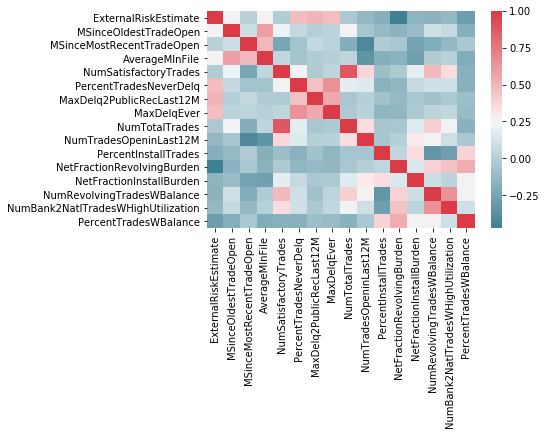

In [83]:
import seaborn as sb
corr = mySample_cleaned1.loc[:,mySample_cleaned1.dtypes == 'int64'].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sb.diverging_palette(220, 10, as_cmap=True))

As NetFractionInstallBurden shows little correlation with most features, while averages could be put in place, it's better to remove the feature as the information entropy (amount of unknown information/derivable information from this feature) is very low, and replacing over a 1/3rd of the data in the feature could accidentally synthesize or overemphasize a known to be statistically insignificant trend, thus removal is the better option in this instance. The other features are low enough that replacing them missing values with averages should be beneficial. 

Looking at the 75% versus max for 

MSinceOldestTradeOpen (258.00, 589.0), 

MSinceMostRecentTradeOpen (11.00, 184.0), 

AverageMInFile (96.00, 273.0), 

NumSatisfactoryTrades (29.00, 74.0), 

NumTotalTrades (31.00, 77.0), 

NumTradesOpeninLast12M (3.00, 10.0), 

PercentInstallTrades (44.00, 100.0), 

NetFractionRevolvingBurden (55.00, 115.0), 

NetFractionInstallBurden (80.25, 196.0), 

NumRevolvingTradesWBalance (5.00, 25.0), 

NumBank2NatlTradesWHighUtilization (2.00, 15.0), 

we can see a large gap in the values, indicating quite a lot of outliers. If these outliers are lowered to just above the upper bound as shown through box plots, the relevancy of any potential trends may be more obvious. 

PercentTradesNeverDelq has this issue in reverse, but with the lowest value representing 0 (as in never delinquent) there will be value in keeping this for any modelling as there is correlated pattern shown in the heatmap between those who have a percentage of trades that were delinquent, and those that had none so non change will occur here.

In [84]:
mySample_cleaned1.select_dtypes(['category']).describe().T

,count,unique,top,freq
NumTrades60Ever2DerogPubRec,307,4,Never,183
NumTrades90Ever2DerogPubRec,216,4,Never,145
MSinceMostRecentDelq,944,7,Unknown,460
MSinceMostRecentInqexcl7days,944,6,Never,431
NumInqLast6M,944,6,unknown,367
NumInqLast6Mexcl7days,944,6,unknown,374
NumInstallTradesWBalance,944,7,1,277


Categorically speaking, NumInqLast6M and NumInqLast6Mexcl7days are needlessly similar as they represent almost the same data, with no meaning to skipping the 7 day period. Therefore only the feature *including* the 7 days should be kept to avoid duplicates. Arguably, this also applies to the NumTradesXEver/DerogPubRec as it was noted on initial inspection when choosing categorical or continuous, that there would be quite a lot of overlap. For this reason, either could be removed (both showed the same trend with 'good' customers vs 'bad' customers). Therefore, 90 days should be removed over 60 days as 60 days encompasses more records.

The top frequency in many instances was 'never', implying most customers with loans, overdrafts or credit cards have not acquired any serious delinquencies of note, while also having at least one active item.

It will be interesting to see the most frequent options for those with unknown values as the most frequent response after the data quality is improved

#### Histograms for Continuous Features

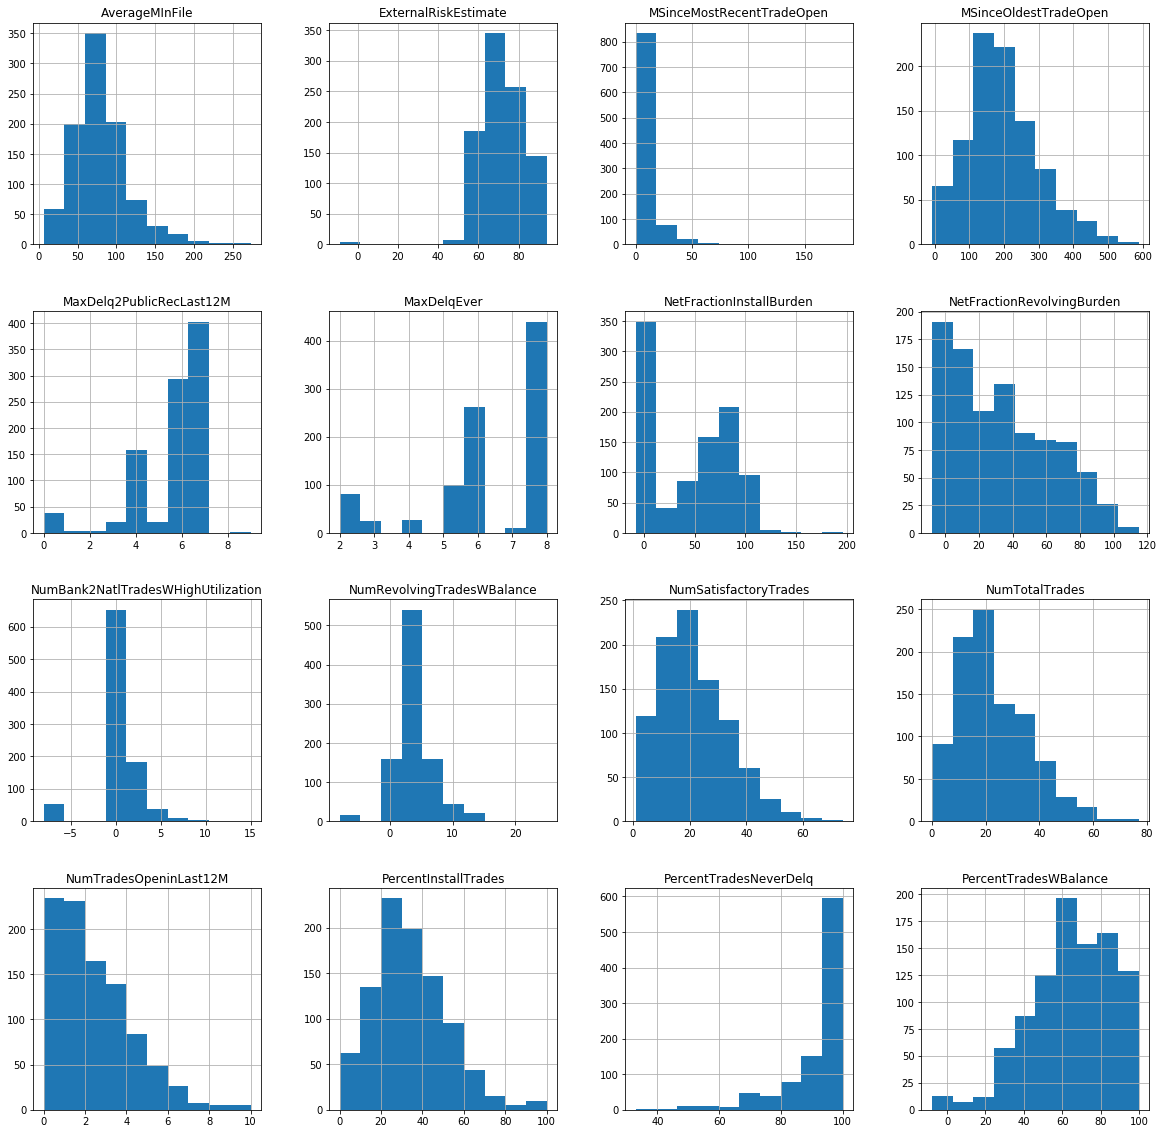

In [85]:
mySample_cleaned1.hist(figsize=(20, 20))

#save histograms as image
plt.savefig('CreditRisk-18206383-DataQualityReport-NumericFeatures-Histograms.png')

The average of monthsSinceOldestTradeOpened is distributed normally, with most customers being clients of the bank for ~200 months (over 16 years!). The majority of customers are close to if not at 100% of their trades never being delinquent (PercentTradesNeverDelq), and most customers also appear to have recently opened one or more trades (MSinceMostRecentTradeOpen/NumTradesOpeninLast12M) explaining the high amount of trades with a balance left to pay (PercentTradesWBalance).

#### Box Plots for Continuous Features

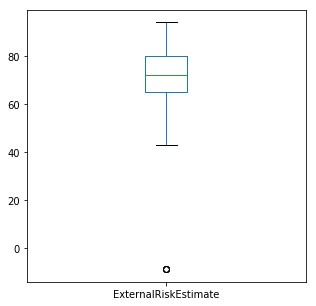

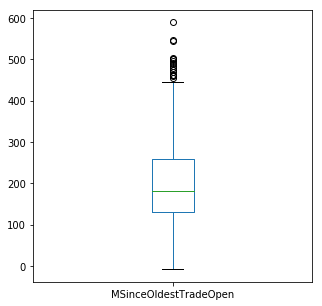

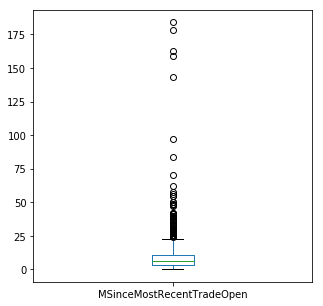

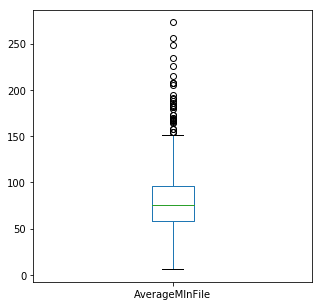

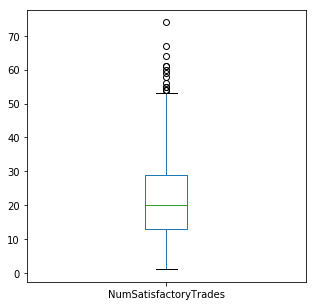

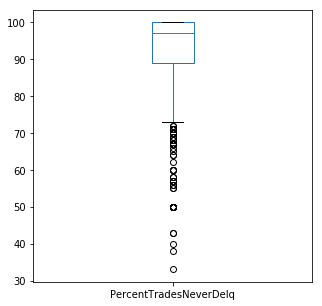

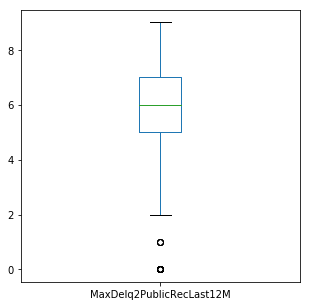

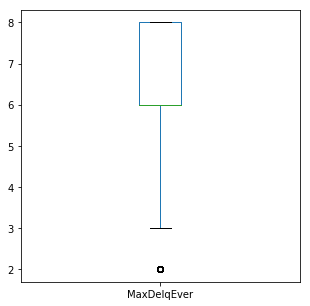

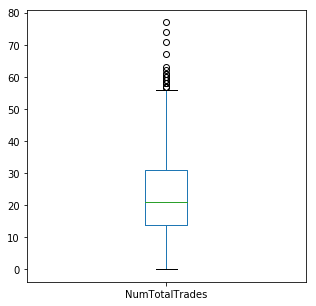

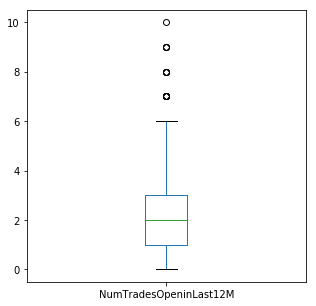

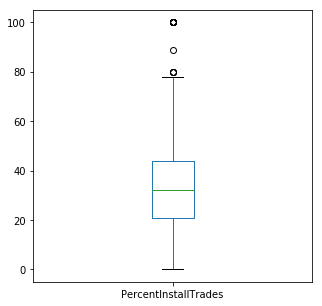

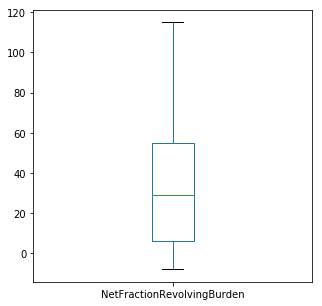

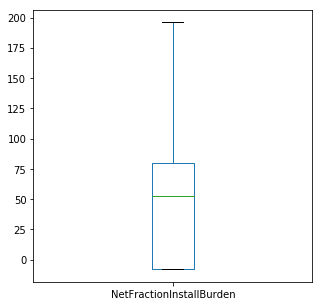

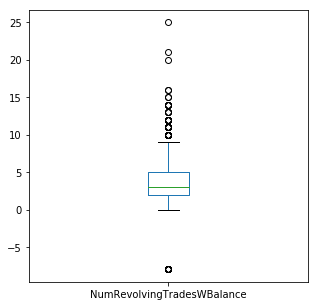

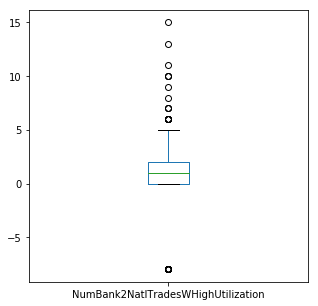

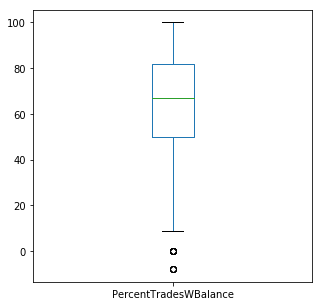

<Figure size 432x288 with 0 Axes>

In [86]:
for column in numeric_columns:
    mySample_cleaned1[column].plot(kind='box', figsize=(5,5))
    plt.show()


#save boxplots as image
plt.savefig('CreditRisk-18206383-DataQualityReport-NumericFeatures-Boxplots.png')

Many of the boxplotted features show outliers. Most of the outliers are larger than the max cut off point (upper bound), and in some cases such as MSinceMostRecentTradeOpen make the plot difficult to read. For these instances, it is suggesed that imputation to remove the unknown data be combined with an upper bound to represent the data without losing the pattern due to scattered outliers. 

The only instance of a significant amount of outliers below the lower bound is PercentTradesNeverDelq. However the fact that many people have not been delinquent is represented across many features, and is an importannt trend and as such will neither be bounded nor removed.

#### Bar Plots for Categorical Features

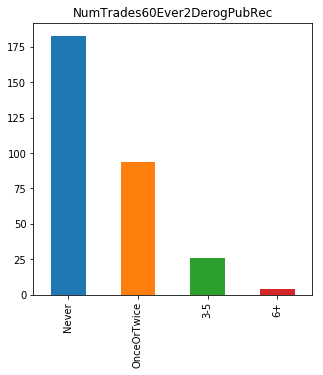

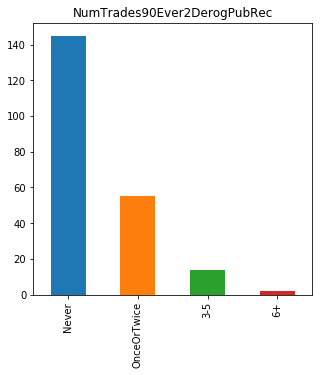

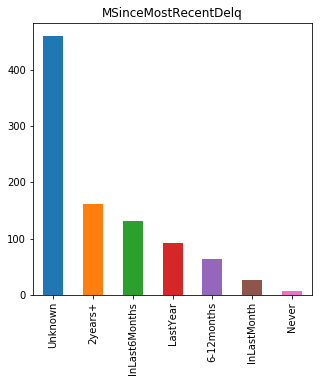

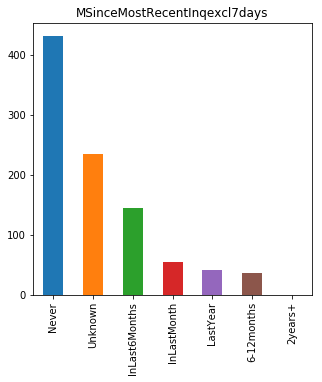

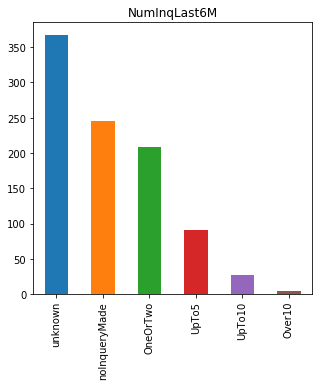

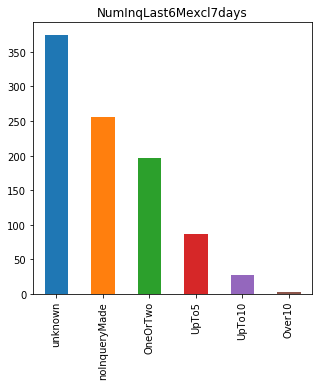

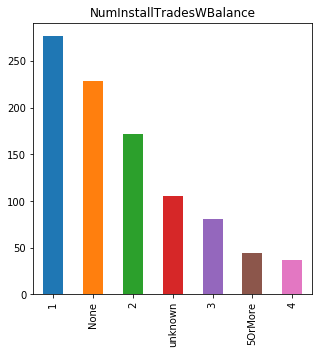

<Figure size 432x288 with 0 Axes>

In [87]:
for column in categorical_columns:
    mySample_cleaned1[column].value_counts().plot(kind='bar', title=column, figsize=(5,5))
    plt.show()


#save barplots as image
plt.savefig('CreditRisk-18206383-DataQualityReport-NumericFeatures-Barplots.png')

It should be noted to read with caution, as the plots appear order by frequency, than by x-axis value. All of the plotted features were changed from continuous features, and so the bins are relatively suited to the needs without cardinality issues. There is however an issue with multiple features effectively providing the same data, resulting in redundant information in the data. For this reason, the 2 sets of feature pairs below will see one feature removed each:

NumTrades60Ever2DerogPubRec: Do nothing  |  NumTrades90Ever2DerogPubRec: Delete

NumInqLast6M: Do nothing  |  NumInqLast6Mexcl7days: Delete

It was explained above during analysis of the categorical data table why the features to delete were chosen. NetFractionInstallBurden was also indicated to be deleted, as almost all of the data represented is either 0 or missing (34.5%), with no high correlation to any other useful features and thus is being removed rather than risking data falsification.

# **Save the initial discussion of your findings into a single data quality report PDF file**

The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion and justification will not receive full marks.

# (2) Prepare a data quality plan for the cleaned CSV file

### data quality plan:
   
| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| RiskPerformance         | none                 | Do nothing                   |
| ExternalRiskEstimate    | Missing value(4 rows)| Imputation                   | 
| MSinceOldestTradeOpen   | Outliers(high)&MissingValues(34rows)| Imputation    |
| MSinceMostRecentTradeOpen| Outliers (high)     | Bring closer to bounds       |
| AverageMInFile          | Outliers (high)      | Bring closer to bounds       |
| NumSatisfactoryTrades   | Outliers (high)      | Bring closer to bounds       |
| NumTrades60Ever2DerogPubRec| none              | Do nothing                   |
| NumTrades90Ever2DerogPubRec| No new info       | Remove column                |
| PercentTradesNeverDelq  | Outliers (low)       | Do nothing                   |
| MSinceMostRecentDelq    | none                 | Do nothing                   |
| MaxDelq2PublicRecLast12M| none                 | Do nothing                   |
| MaxDelqEver             | none                 | Do nothing                   |
| NumTotalTrades          | Outliers (high)      | Bring closer to bounds       |
| NumTradesOpeninLast12M  | Outliers (high)      | Bring closer to bounds       |
| PercentInstallTrades    | Outliers (high)      | Bring closer to bounds       |
| MSinceMostRecentInqexcl7days|  none            | Do nothing                   |
| NumInqLast6M            | none                 | Do nothing                   |
| NumInqLast6Mexcl7days   | No new info          | Remove column                |
| NetFractionRevolvingBurden| MissingValues(18rows)| Imputation                 |
| NetFractionInstallBurden| Missing Value(34.5%) | Remove Column                |
| NumRevolvingTradesWBalance| Outliers(high)&MissingValues(17rows)| Imputation  |
| NumInstallTradesWBalance| none                 | Do nothing                   |
| NumBank2NatlTradesWHighUtilization| Outliers(high)&MissingValues(54rows)|Imputation|
| PercentTradesWBalance   | Missing value(5 rows)| Imputation                   |

#### Apply your solutions

In [88]:
#Delete features
try:
    mySample_cleaned1 = mySample_cleaned1.drop(['NumTrades90Ever2DerogPubRec'], axis=1)
    print(mySample_cleaned1.shape)
except:
    print("NumTrades90Ever2DerogPubRec already deleted")
    print(mySample_cleaned1.shape)

(944, 23)


In [89]:
#Delete features
try:
    mySample_cleaned1 = mySample_cleaned1.drop(['NumInqLast6Mexcl7days'], axis=1)
    print(mySample_cleaned1.shape)
except:
    print("NumInqLast6Mexcl7days already deleted")
    print(mySample_cleaned1.shape)

(944, 22)


In [90]:
try:
    mySample_cleaned1 = mySample_cleaned1.drop(['NetFractionInstallBurden'], axis=1)
    print(mySample_cleaned1.shape)
except:
    print("NetFractionInstallBurden already deleted")
    print(mySample_cleaned1.shape)

(944, 21)


In [91]:
#Setting upper limit for outliers for MSinceOldestTradeOpen
UpperBound = 450 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['MSinceOldestTradeOpen'] > UpperBound, 'MSinceOldestTradeOpen'] = UpperBound
#mySample_cleaned1['MSinceOldestTradeOpen'].plot(kind='box')

In [92]:
#Setting upper limit for outliers for MSinceMostRecentTradeOpen
UpperBound = 25 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['MSinceMostRecentTradeOpen'] > UpperBound, 'MSinceMostRecentTradeOpen'] = UpperBound
#mySample_cleaned1['MSinceMostRecentTradeOpen'].plot(kind='box')

In [93]:
#Setting upper limit for outliers for AverageMInFile
UpperBound = 150 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['AverageMInFile'] > UpperBound, 'AverageMInFile'] = UpperBound
#mySample_cleaned1['AverageMInFile'].plot(kind='box')

In [94]:
#Setting upper limit for outliers for NumSatisfactoryTrades
UpperBound = 53 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['NumSatisfactoryTrades'] > UpperBound, 'NumSatisfactoryTrades'] = UpperBound
#mySample_cleaned1['NumSatisfactoryTrades'].plot(kind='box')

In [95]:
#Setting upper limit for outliers for NumTotalTrades
UpperBound = 55 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['NumTotalTrades'] > UpperBound, 'NumTotalTrades'] = UpperBound
#mySample_cleaned1['NumTotalTrades'].plot(kind='box')

In [96]:
#Setting upper limit for outliers for NumTradesOpeninLast12M
UpperBound = 6 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['NumTradesOpeninLast12M'] > UpperBound, 'NumTradesOpeninLast12M'] = UpperBound
#mySample_cleaned1['NumTradesOpeninLast12M'].plot(kind='box')

In [97]:
#Setting upper limit for outliers for PercentInstallTrades
UpperBound = 80 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['PercentInstallTrades'] > UpperBound, 'PercentInstallTrades'] = UpperBound
#mySample_cleaned1['PercentInstallTrades'].plot(kind='box')

In [98]:
#Setting upper limit for outliers for NumRevolvingTradesWBalance
UpperBound = 10 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['NumRevolvingTradesWBalance'] > UpperBound, 'NumRevolvingTradesWBalance'] = UpperBound
#mySample_cleaned1['NumRevolvingTradesWBalance'].plot(kind='box')

In [99]:
#Setting upper limit for outliers for NumBank2NatlTradesWHighUtilization
UpperBound = 5 #Upper limit from boxplot
mySample_cleaned1.loc[mySample_cleaned1['NumBank2NatlTradesWHighUtilization'] > UpperBound, 'NumBank2NatlTradesWHighUtilization'] = UpperBound
#mySample_cleaned1['NumBank2NatlTradesWHighUtilization'].plot(kind='box')

In [100]:
#Replace -9 and -8 with average values for ExternalRiskEstimate
mean = mySample_cleaned1.ExternalRiskEstimate.mean()
if len(mySample[mySample['ExternalRiskEstimate'] == -8]) > 0:
    mySample_cleaned1.ExternalRiskEstimate.replace(-8, mean, inplace=True)
if len(mySample[mySample['ExternalRiskEstimate'] == -9]) > 0:
    mySample_cleaned1.ExternalRiskEstimate.replace(-9, mean, inplace=True)

In [101]:
#Replace -9 and -8 with average values for MSinceOldestTradeOpen
mean = mySample_cleaned1.MSinceOldestTradeOpen.mean()
if len(mySample[mySample['MSinceOldestTradeOpen'] == -8]) > 0:
    mySample_cleaned1.MSinceOldestTradeOpen.replace(-8, mean, inplace=True)
if len(mySample[mySample['MSinceOldestTradeOpen'] == -9]) > 0:
    mySample_cleaned1.MSinceOldestTradeOpen.replace(-9, mean, inplace=True)

In [102]:
#Replace -9 and -8 with average values for NetFractionRevolvingBurden
mean = mySample_cleaned1.NetFractionRevolvingBurden.mean()
if len(mySample[mySample['NetFractionRevolvingBurden'] == -8]) > 0:
    mySample_cleaned1.NetFractionRevolvingBurden.replace(-8, mean, inplace=True)
if len(mySample[mySample['NetFractionRevolvingBurden'] == -9]) > 0:
    mySample_cleaned1.NetFractionRevolvingBurden.replace(-9, mean, inplace=True)

In [103]:
#Replace -9 and -8 with average values for NumRevolvingTradesWBalance
mean = mySample_cleaned1.NumRevolvingTradesWBalance.mean()
if len(mySample[mySample['NumRevolvingTradesWBalance'] == -8]) > 0:
    mySample_cleaned1.NumRevolvingTradesWBalance.replace(-8, mean, inplace=True)
if len(mySample[mySample['NumRevolvingTradesWBalance'] == -9]) > 0:
    mySample_cleaned1.NumRevolvingTradesWBalance.replace(-9, mean, inplace=True)

In [104]:
#Replace -9 and -8 with average values for NumBank2NatlTradesWHighUtilization
mean = mySample_cleaned1.NumBank2NatlTradesWHighUtilization.mean()
if len(mySample[mySample['NumBank2NatlTradesWHighUtilization'] == -8]) > 0:
    mySample_cleaned1.NumBank2NatlTradesWHighUtilization.replace(-8, mean, inplace=True)
if len(mySample[mySample['NumBank2NatlTradesWHighUtilization'] == -9]) > 0:
    mySample_cleaned1.NumBank2NatlTradesWHighUtilization.replace(-9, mean, inplace=True)

In [105]:
#Replace -9 and -8 with average values for PercentTradesWBalance
mean = mySample_cleaned1.PercentTradesWBalance.mean()
if len(mySample[mySample['PercentTradesWBalance'] == -8]) > 0:
    mySample_cleaned1.PercentTradesWBalance.replace(-8, mean, inplace=True)
if len(mySample[mySample['PercentTradesWBalance'] == -9]) > 0:
    mySample_cleaned1.PercentTradesWBalance.replace(-9, mean, inplace=True)

#### Fix type casting after alterations

In [106]:
mySample_cleaned1['RiskPerformance'] = mySample_cleaned1['RiskPerformance'].astype('category')
mySample_cleaned1['ExternalRiskEstimate'] = mySample_cleaned1['ExternalRiskEstimate'].astype('int64')
mySample_cleaned1['MSinceOldestTradeOpen'] = mySample_cleaned1['MSinceOldestTradeOpen'].astype('int64')
mySample_cleaned1['NetFractionRevolvingBurden'] = mySample_cleaned1['NetFractionRevolvingBurden'].astype('int64')
mySample_cleaned1['NumRevolvingTradesWBalance'] = mySample_cleaned1['NumRevolvingTradesWBalance'].astype('int64')
mySample_cleaned1['NumBank2NatlTradesWHighUtilization'] = mySample_cleaned1['NumBank2NatlTradesWHighUtilization'].astype('int64')
mySample_cleaned1['PercentTradesWBalance'] = mySample_cleaned1['PercentTradesWBalance'].astype('int64')

In [107]:
mySample_cleaned1.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec           category
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                  category
MaxDelq2PublicRecLast12M                 int64
MaxDelqEver                              int64
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days          category
NumInqLast6M                          category
NetFractionRevolvingBurden               int64
NumRevolvingTradesWBalance               int64
NumInstallTradesWBalance              category
NumBank2NatlTradesWHighUtilization       int64
PercentTradesWBalance                    int64
dtype: object

#### Cleaned data results:

In [108]:
mySample_cleaned1.select_dtypes(['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,944.0,72.077331,9.714228,43.0,65.0,72.0,80.0,94.0
MSinceOldestTradeOpen,944.0,201.960805,95.366845,2.0,138.0,189.0,258.0,450.0
MSinceMostRecentTradeOpen,944.0,8.210805,7.053578,0.0,3.0,6.0,11.0,25.0
AverageMInFile,944.0,78.352754,31.469245,6.0,58.0,76.0,96.0,150.0
NumSatisfactoryTrades,944.0,21.515890,11.752203,1.0,13.0,20.0,29.0,53.0
PercentTradesNeverDelq,944.0,92.345339,11.425976,33.0,89.0,97.0,100.0,100.0
MaxDelq2PublicRecLast12M,944.0,5.733051,1.696709,0.0,5.0,6.0,7.0,9.0
MaxDelqEver,944.0,6.358051,1.893500,2.0,6.0,6.0,8.0,8.0
NumTotalTrades,944.0,22.880297,12.812353,0.0,14.0,21.0,31.0,55.0
NumTradesOpeninLast12M,944.0,1.919492,1.709521,0.0,1.0,2.0,3.0,6.0


#### Cleaned categorical features:

In [109]:
mySample_cleaned1.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,944,2,Bad,500
NumTrades60Ever2DerogPubRec,307,4,Never,183
MSinceMostRecentDelq,944,7,Unknown,460
MSinceMostRecentInqexcl7days,944,6,Never,431
NumInqLast6M,944,6,unknown,367
NumInstallTradesWBalance,944,7,1,277


#### Save cleaned data to new csv

In [110]:
#Save to csv
mySample_cleaned1.to_csv('CreditRisk18206383-cleaned2.csv', index=False)
#read csv file
mySample_cleaned2 = pd.read_csv('CreditRisk18206383-cleaned2.csv')

# (3) Exploring relationships between feature pairs:

### Choose a subset of features you find promising and plot pairwise feature interactions

#### continuous-continuous feature plots

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text xticklabel objects>)

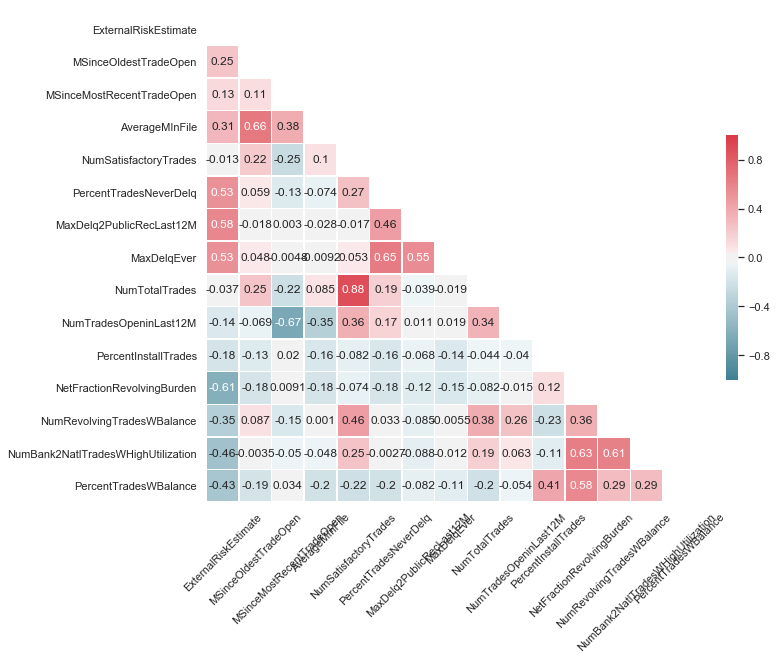

In [111]:
# Correlation matrix 
sb.set(style="white")

# Select columns containing continuous data
numeric_columns = mySample_cleaned2.select_dtypes(['int64', 'float64']).columns

# Calculate correlation of all pairs of continuous features
corr = mySample_cleaned2[numeric_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

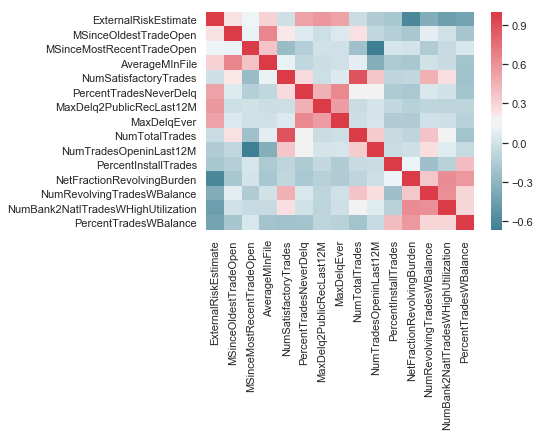

In [112]:
#overlapping issue so below to compliment
corr = mySample_cleaned2.loc[:,mySample_cleaned2.dtypes == 'int64'].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sb.diverging_palette(220, 10, as_cmap=True))

C:\Users\Jessie\Anaconda3\envs\comp47350py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


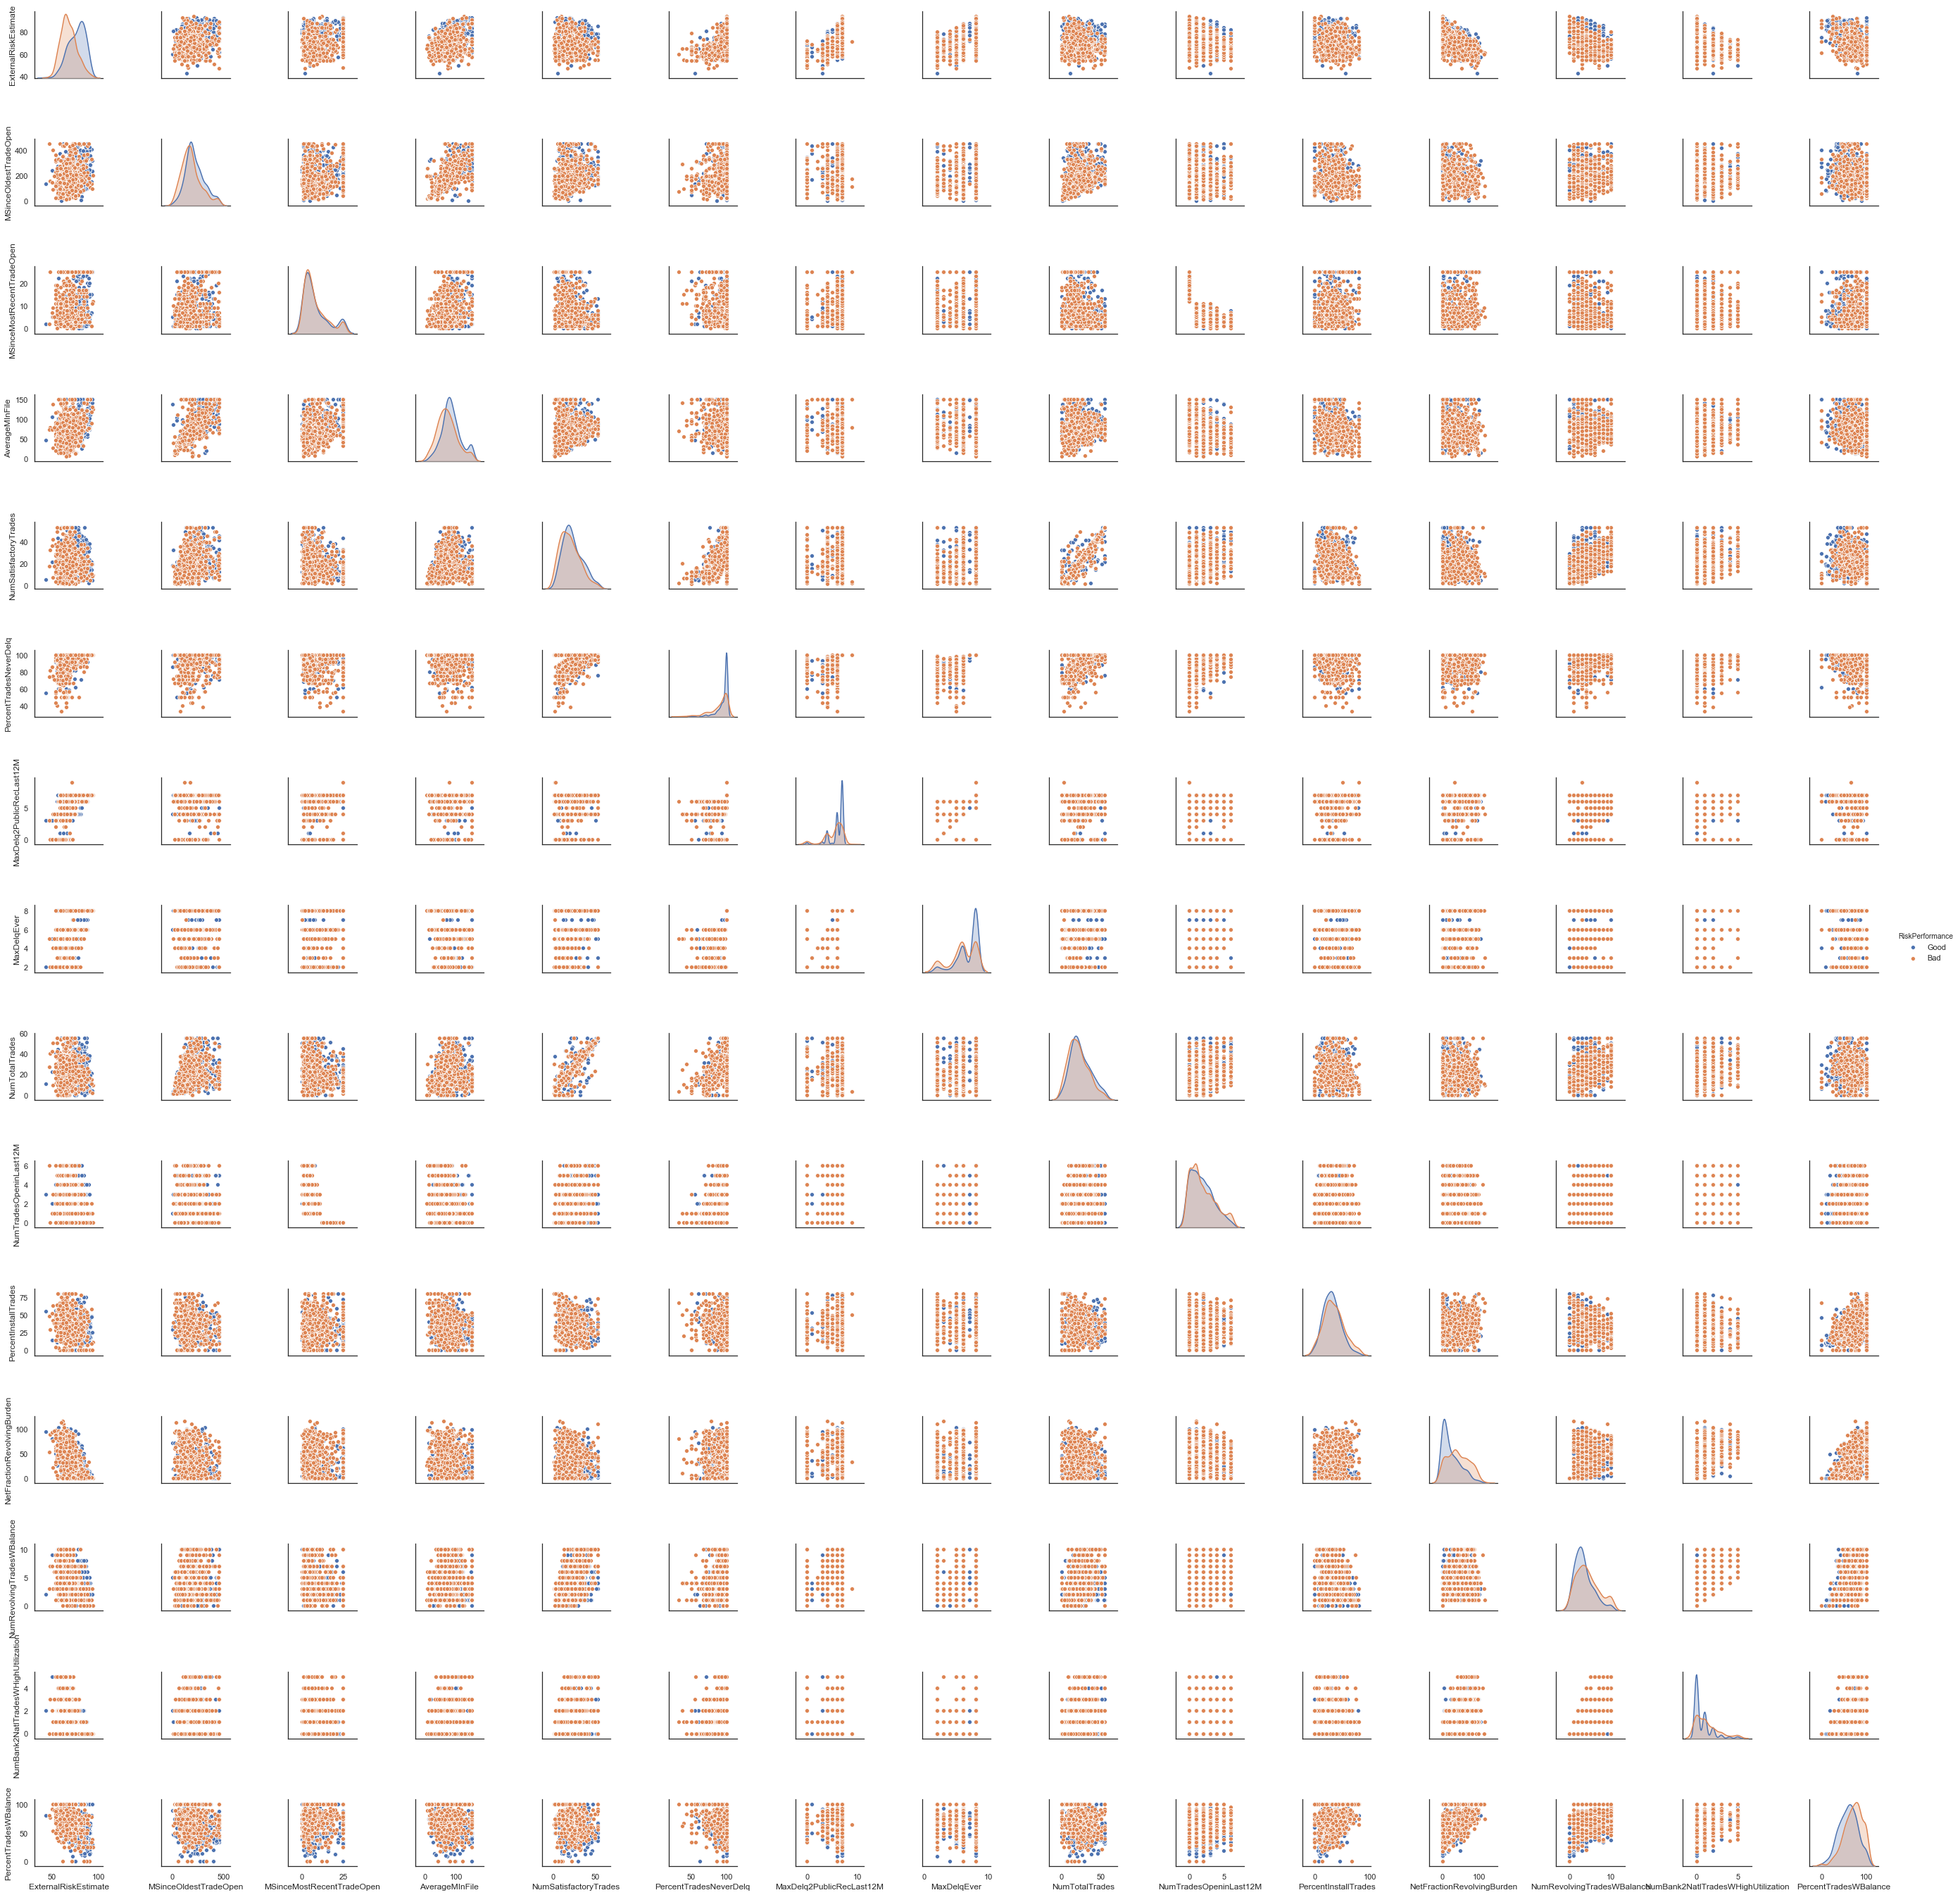

In [113]:
sb.pairplot(mySample_cleaned2, hue="RiskPerformance")

In the following cells are the plots for pairs of continuous features which have been shown to have a high correlation above(easier to read and see if redone):

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

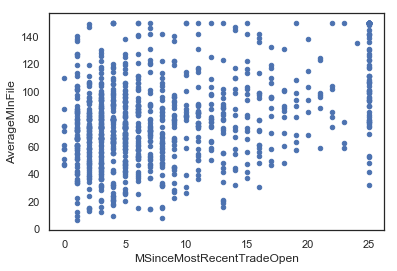

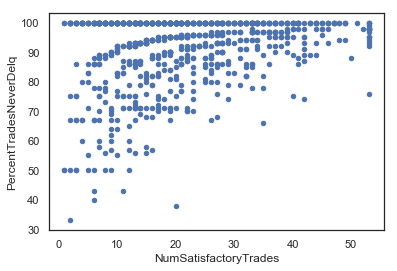

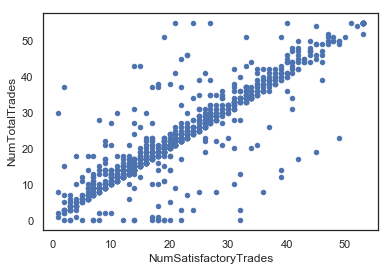

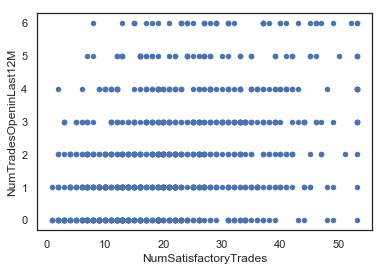

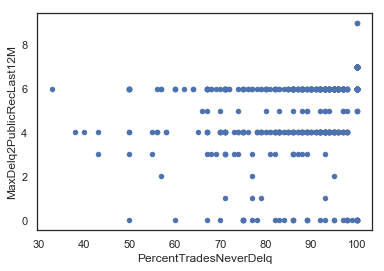

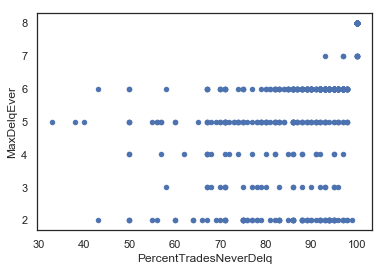

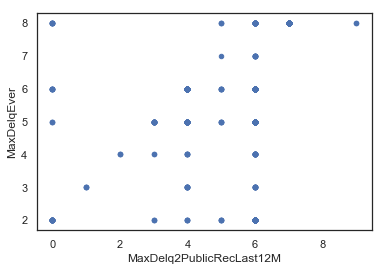

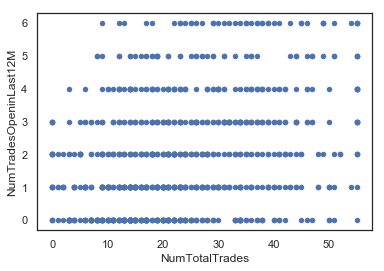

In [114]:
mySample_cleaned2.plot(kind='scatter', x='MSinceMostRecentTradeOpen', y='AverageMInFile')
mySample_cleaned2.plot(kind='scatter', x='NumSatisfactoryTrades', y='PercentTradesNeverDelq')
mySample_cleaned2.plot(kind='scatter', x='NumSatisfactoryTrades', y='NumTotalTrades')
mySample_cleaned2.plot(kind='scatter', x='NumSatisfactoryTrades', y='NumTradesOpeninLast12M')
mySample_cleaned2.plot(kind='scatter', x='PercentTradesNeverDelq', y='MaxDelq2PublicRecLast12M')
mySample_cleaned2.plot(kind='scatter', x='PercentTradesNeverDelq', y='MaxDelqEver')
mySample_cleaned2.plot(kind='scatter', x='MaxDelq2PublicRecLast12M', y='MaxDelqEver')
mySample_cleaned2.plot(kind='scatter', x='NumTotalTrades', y='NumTradesOpeninLast12M')

NumSatisfactoryTrades shows a rough logarithmic pattern with PercentTradesNeverDelq, where there is an initial quick rise and slow growth after. This is logical as if a customer already has 12 satisfactory trades, chances are the next will be too. But a new customer with only 1 satisfactory trade has much more potential to produce an instance of delinquency. This also matches up with logarithmic (log) growth. Let's say 'n' represents the number of satisfactory trades a customer has had, with more trades means being reassessed and reawarded based on lack of delinquency, the trend of reproducing good trades is more likely (evening out after initial growth). 

NumSatisfactoryTrades also has a linear relationship with NumTotalTrades. Again, this is a very logical trend as more trades will only be awarded if most of the previous trades were satisfactory.

The other scatter plots appear more accidentally related to due the data being tied than true relationship correlations i.e. if you opened more trades in the last 12 months, you will have more trades total. Thus while correlated, why they are correlated doesn't really give us information on seperating out good vs bad customers

#### Categorical-categorical feature plots

(0, 100)

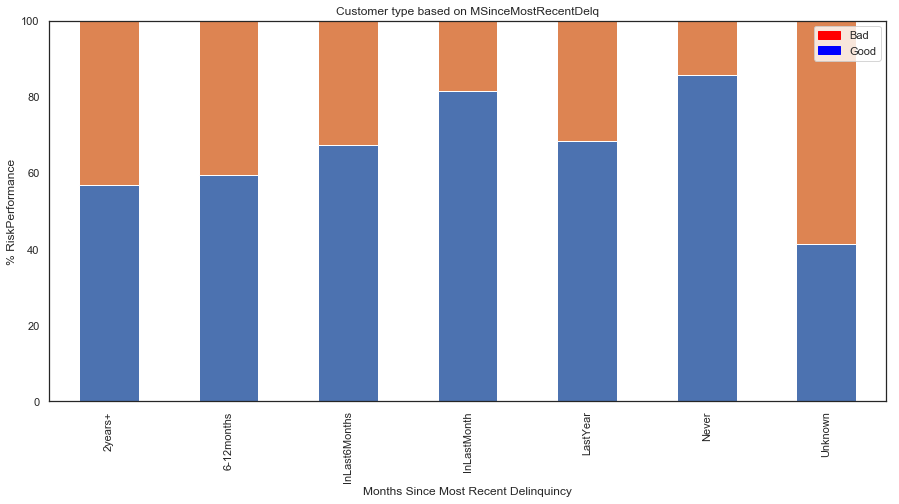

In [115]:
import matplotlib.patches as mpatches

varMSinceMostRecentDelq = pd.unique(mySample_cleaned2.MSinceMostRecentDelq.ravel())

mySample_cleaned2['MSinceMostRecentDelq%'] = 0

for i in varMSinceMostRecentDelq:
    count = 1 / mySample_cleaned2[mySample_cleaned2.MSinceMostRecentDelq == i].count()['RiskPerformance']
    index_list = mySample_cleaned2[mySample_cleaned2['MSinceMostRecentDelq'] == i].index.tolist()
    for ind in index_list:
        mySample_cleaned2.loc[ind, 'MSinceMostRecentDelq%'] = count * 100
        
group = mySample_cleaned2[['MSinceMostRecentDelq%','MSinceMostRecentDelq','RiskPerformance']].groupby(['MSinceMostRecentDelq','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Customer type based on MSinceMostRecentDelq", figsize=(15,7))

red_patch = mpatches.Patch(color='red', label='Bad')
blue_patch = mpatches.Patch(color='blue', label='Good')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Months Since Most Recent Delinquincy")
my_plot.set_ylabel("% RiskPerformance")
my_plot.set_ylim([0,100])

It is very interesting that here, the missing data has a story to tell. The majority of those who did not disclose how long it had been since their most recent delinquincy, were more often those who went on to commit further delinquincies, resulting in them being 'bad'.

(0, 100)

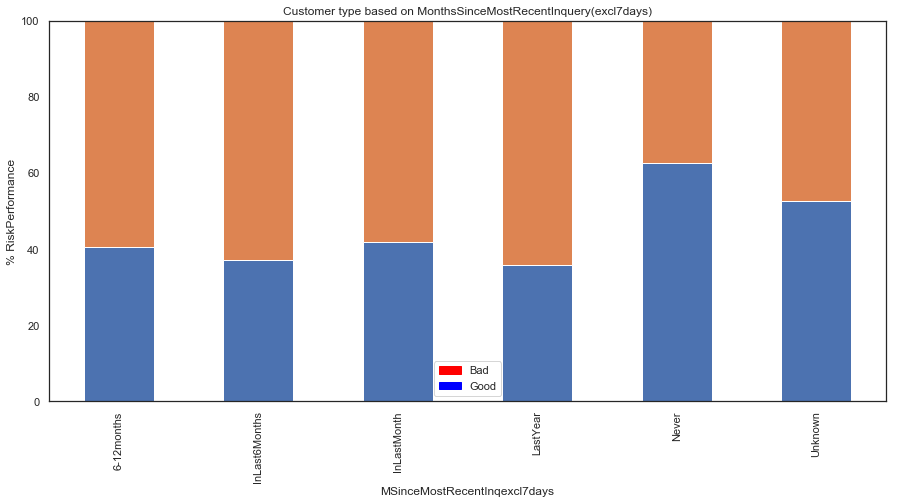

In [116]:
varMSinceMostRecentInqexcl7days = pd.unique(mySample_cleaned2.MSinceMostRecentInqexcl7days.ravel())

mySample_cleaned2['MSinceMostRecentInqexcl7days%'] = 0

for i in varMSinceMostRecentInqexcl7days:
    count = 1 / mySample_cleaned2[mySample_cleaned2.MSinceMostRecentInqexcl7days == i].count()['RiskPerformance']
    index_list = mySample_cleaned2[mySample_cleaned2['MSinceMostRecentInqexcl7days'] == i].index.tolist()
    for ind in index_list:
        mySample_cleaned2.loc[ind, 'MSinceMostRecentInqexcl7days%'] = count * 100
        
group = mySample_cleaned2[['MSinceMostRecentInqexcl7days%','MSinceMostRecentInqexcl7days','RiskPerformance']].groupby(['MSinceMostRecentInqexcl7days','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Customer type based on MonthsSinceMostRecentInquery(excl7days)", figsize=(15,7))

red_patch = mpatches.Patch(color='red', label='Bad')
blue_patch = mpatches.Patch(color='blue', label='Good')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("MSinceMostRecentInqexcl7days")
my_plot.set_ylabel("% RiskPerformance")
my_plot.set_ylim([0,100])

Again here we see a trend, with 'bad' customers making the majority of the inqueries, as well as a tendancy for them to potentially be newer customers to the client, with the most inqueries coming in the last year, or refusing to disclose.

#### Continuous-categorical feature plots

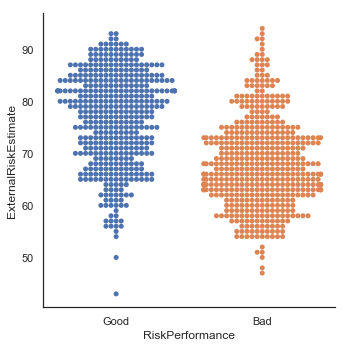

In [117]:
sb.catplot(x="RiskPerformance", y="ExternalRiskEstimate", hue="RiskPerformance", kind="swarm", data=mySample_cleaned2);

Here we can see a visible demonstration of the ExternalRiskEstimate being lower for those who are not good customers? Which is unusual as the risk should most definitely be higher for those who were bad customers. This does however fit in with our observations on the missing/refused data, that certain omissions are intentional to lower the overall score, while good customers remain unaltered thus leaving them slightly higher. This is a very important trend to note as models will need to identify trends and behaviour patterns such as these to better predict future customers behaviours.

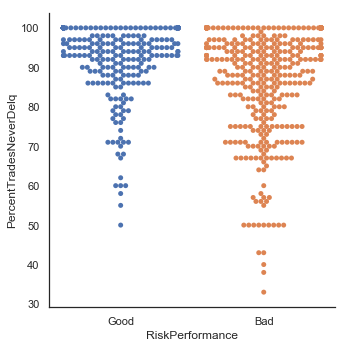

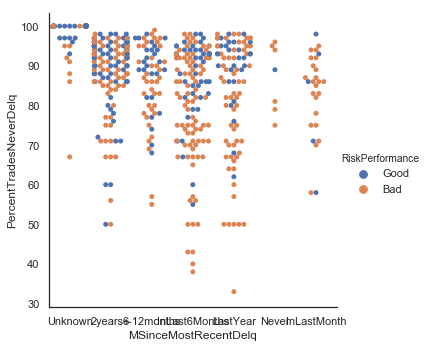

In [118]:
sb.catplot(x="RiskPerformance", y="PercentTradesNeverDelq", hue="RiskPerformance", kind="swarm", data=mySample_cleaned2)
sb.catplot(x="MSinceMostRecentDelq", y="PercentTradesNeverDelq", hue="RiskPerformance", kind="swarm", data=mySample_cleaned2)

As the percentage of trades without any delinquency decreases here, we can see that the lower outliers (below 50%) are in the majority 'bad' customers. We can also see that in the next plot this matches up, while also indicating that the majority of delinquincies by higher percentages have all been very recent, almost dominating the last month, and with clusters in the last 6 months and year. Never is also dominated by 'bad', but this could be newer customers. The rest is within averages when remembering that this particular sample is skewed with an ~1:1 ratio instead of the 40'good':1'bad'. If a trend was to be derived over the plot. The bottom and right hand sides of the plot indicate a much higher liklihood of delinquincies/'bad' customers.

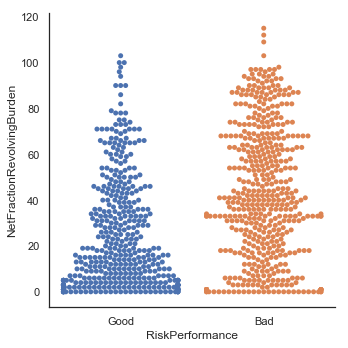

In [119]:
sb.catplot(x="RiskPerformance", y="NetFractionRevolvingBurden", hue="RiskPerformance", kind="swarm", data=mySample_cleaned2);

For this, we can see a simple spread of 'good' customers being less likely to be close to the limit of their credit on their creditcards/overdrafts/etc, which is a logical conclusion that customers unable or unwilling to meet repayments may be closer to their credit limit.

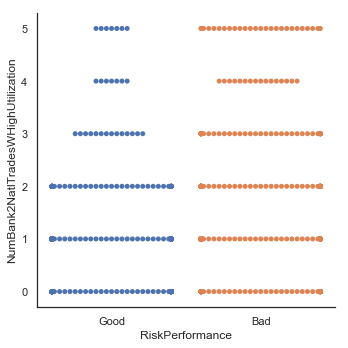

In [120]:
sb.catplot(x="RiskPerformance", y="NumBank2NatlTradesWHighUtilization", hue="RiskPerformance", kind="swarm", data=mySample_cleaned2);

Interestingly, following along with the assumption drawn from the above data, one would expect a measure of how close a customer is to their limit('High Utilization') to concur with the rest of the data. Yet this particular feature gives very little in the way of new information, and almost implies a pattern does not exist between being close to a financial limit and delinquincy, which is unlikely to be accurate. As both NumBank/NatTradesWithHighUtilization and NetFractionRevolvingBurden have already been shown to be correlated (0.63, where >.6 = statistically significant), a pattern is known to exist in NumBank/NatTradesWithHighUtilization, it is merely difficult to visualize here.

#### Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.

The data is challenging to understand in terms of relations, as without a finiancial background the understood link between the features does not exist, even if the individual meaning of each feature exists. This knowledge gap between between feature links can lead to missed or misinterpreted patterns. For this reason, there is a heavy reliance on what the staticial analyses provide, and would serve better if inspected by a finiancial officer before training a model.

There are significant connections between NumSatisfactoryTrades and PercentTradesNeverDelq, NumSatisfactoryTrades and NumTotalTrades, NumSatisfactoryTrades and NumTradesOpeninLast12M, PercentTradesNeverDelq and MaxDelq2PublicRecLast12M, PercentTradesNeverDelq and MaxDelqEver, MaxDelq2PublicRecLast12M and MaxDelqEver, NumTotalTrades and NumTradesOpeninLast12M, all of which are logically related such that we can infer that 'bad' customers are liekly to have a lower number of total trades (NumTotalTrades), likely to have a higher frequency of inqueries (MSinceMostRecentInqexcl7days) and delinquincies in recent months (MSinceMostRecentDelq/PercentTradesNeverDelq) yet have actually received/opened fewer trades recently (NumTradesOpeninLast12M) with success (NumSatisfactoryTrades) and are likely to have a higher percentage balance left to pay on a revolving trade (NetFractionRevolvingBurden).

These features have potential as candidates for a predictive model of customer risk performance.

In [121]:
#analysis complete, remove temporary categorical-categorical plot columns
try:
    mySample_cleaned1 = mySample_cleaned1.drop(['MSinceMostRecentDelq%'], axis=1)
except:
    print("MSinceMostRecentDelq% already deleted")

try:
    mySample_cleaned1 = mySample_cleaned1.drop(['MSinceMostRecentInqexcl7days%'], axis=1)
except:
    print("MSinceMostRecentInqexcl7days% already deleted")
    

print(mySample_cleaned2.dtypes)

MSinceMostRecentDelq% already deleted
MSinceMostRecentInqexcl7days% already deleted
RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec            object
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                   object
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days           object
NumInqLast6M                           object
NetFractionRevolvingBurden              int64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance               object
NumBank2NatlTradesWHighUtilization      in

# (4) Transform, extend or combine the existing features to create a few new features

The first derived feature will be percentage of trades deemed 'good'/'satisfactory'. If we can analyse how many times they've been satisfactory, I believe a pattern of unsatisfactory trades will emerge which could help identify those more prone to delinquency

In [122]:
mySample_cleaned2['PercentBadTrades'] = int(0)
incr = 0
RowSpan = len(mySample_cleaned2)

while incr < RowSpan:
    rowSatTrades = mySample_cleaned2.NumSatisfactoryTrades[incr]
    #print(rowSatTrades)
    rowNumTotalTrades = mySample_cleaned2.NumTotalTrades[incr]
    #print(rowNumTotalTrades)
    if rowSatTrades == 0 or rowNumTotalTrades == 0:
        rowPercentGoodTrades = 0
    else:
        rowPercentGoodTrades = (rowSatTrades/rowNumTotalTrades) * 100
        rowPercentGoodTrades = int(rowPercentGoodTrades)
        rowPercentBadTrades = 100 - rowPercentGoodTrades
    mySample_cleaned2.loc[incr,'PercentBadTrades'] = rowPercentBadTrades
    incr += 1

The second derived feature will be a categorical one. It will function as a flag, indicating if it falls within the continuous-categorical mapped pattern of percentage of trades never delq falling below 50%. If this is true, it will be marked with a 1 to indicate a flag, and a higher risk individual

In [123]:
mySample_cleaned2['RegularDelqFlag'] = int(0)
incr = 0
while incr < RowSpan:
    rowVal = mySample_cleaned2['PercentTradesNeverDelq'][incr]
    rowVal = int(rowVal)
    if rowVal < 90: #25th for feature is 89%
        mySample_cleaned2.loc[incr,'RegularDelqFlag'] = 1 #where 1 = true and 0 = false
    incr += 1

The third derived feature is to better identify the muddled pattern of 'bad' customers being closer to their maximum credit limit for revolving trades. It will function as another binary categorical flag, with values of NetFractionRevolvingBurden over 50%. By introducing flags, greater weight can be given to negative credit behaviour and not just delinquincies, thereby hoping to better identify 'bad' customers before the issue begins

In [124]:
mySample_cleaned2['HigherUtilizationDelqRisk'] = int(0)
incr = 0
while incr < RowSpan:
    rowVal = mySample_cleaned2['NetFractionRevolvingBurden'][incr]
    if rowVal >= 55: #75th for feature is 55
        mySample_cleaned2.loc[incr,'HigherUtilizationDelqRisk'] = 1 #where 1 = true and 0 = false
    incr += 1

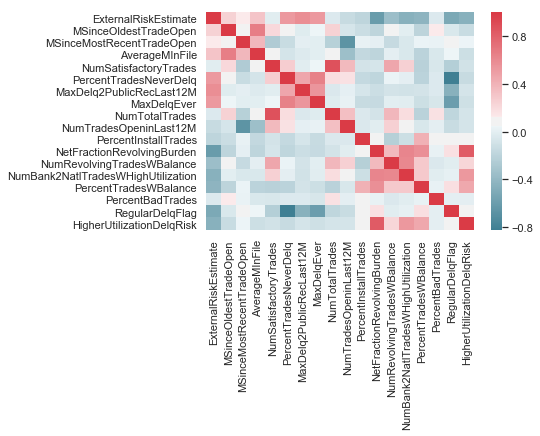

In [125]:
#check if indeed new features provide additional information/correlation
corr = mySample_cleaned2.loc[:,mySample_cleaned2.dtypes == 'int64'].corr()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sb.diverging_palette(220, 10, as_cmap=True))

With the addition of the new features, HigherUtilizationDelqRisk in particualr is proving very useful as an indicator of potential delinquency, with the percentage of unsatisfactory or 'bad' trades proving somewhat less useful than expected

And finally, to save the updated dataset:

In [126]:
mySample_cleaned2.to_csv('CreditRisk18206383-ReadyToModel.csv', index=False)